In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore') 

In [2]:
#Wczytanie 
df = pd.read_csv("kidney_disease.csv")
df.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [4]:
df.shape

(400, 26)

In [5]:
df.drop(columns=['id'], inplace=True) #Usunięcie kolumny id (nie wnosi ona nic do projektu)
df['classification'].value_counts()

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [6]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'classification'] #zmiana nazw aby ulatwic analize (wzięte z kaggle)

In [7]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [8]:
df.info() #rozne rodzaje kolumn

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [9]:
df.isnull().sum().sort_values(ascending=False) #ilosc nulli

red_blood_cells            152
red_blood_cell_count       130
white_blood_cell_count     105
potassium                   88
sodium                      87
packed_cell_volume          70
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
classification               0
dtype: int64

In [10]:
#Szybki podgląd na typy kolumn, jak widać niektóre z nich są zapisane w postaci object
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume          object
white_blood_cell_count      object
red_blood_cell_count        object
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
peda_edema                  object
aanemia                     object
classification              object
dtype: object

In [11]:
#Wypisanie unikalnych wartości dla kolumn zapisanych w typie object 
def showUnique(x):
    for c in x.columns:
        if x[c].dtype == "object":
            print("Kolumna " + str(c) + ":\t" + str(df[c].unique()))
showUnique(df)

Kolumna red_blood_cells:	[nan 'normal' 'abnormal']
Kolumna pus_cell:	['normal' 'abnormal' nan]
Kolumna pus_cell_clumps:	['notpresent' 'present' nan]
Kolumna bacteria:	['notpresent' 'present' nan]
Kolumna packed_cell_volume:	['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']
Kolumna white_blood_cell_count:	['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11

In [12]:
#Jak można zauważyć większość kolumn to kolumny binarne dlatego wystarczy je zamienić tak aby posiadały tylko wartości 0 lub 1
#Natomiast kolumny packed_cell_volume, white_blood_cell_count i red_blood_cell_count muszą zostąc zamienione na typ float
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce') #coerce zamienai wartosci takie jak np\t? na nan aby uniknąć problemów
df['packed_cell_volume'].dtype

dtype('float64')

In [13]:
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'].dtype

dtype('float64')

In [14]:
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['white_blood_cell_count'].dtype

dtype('float64')

In [15]:
#Kolumny do zamiany na typ float zniknęły, natomiast pozostaly jeszcze kolumny które trzeba przekonwertować do postaci binarnej
showUnique(df)

Kolumna red_blood_cells:	[nan 'normal' 'abnormal']
Kolumna pus_cell:	['normal' 'abnormal' nan]
Kolumna pus_cell_clumps:	['notpresent' 'present' nan]
Kolumna bacteria:	['notpresent' 'present' nan]
Kolumna hypertension:	['yes' 'no' nan]
Kolumna diabetes_mellitus:	['yes' 'no' ' yes' '\tno' '\tyes' nan]
Kolumna coronary_artery_disease:	['no' 'yes' '\tno' nan]
Kolumna appetite:	['good' 'poor' nan]
Kolumna peda_edema:	['no' 'yes' nan]
Kolumna aanemia:	['no' 'yes' nan]
Kolumna classification:	['ckd' 'ckd\t' 'notckd']


In [16]:
#Zamiana rzeczy z tabulatorem '\t'
df.replace({'\tno': 'no', '\tyes': 'yes', ' yes': 'yes'}, inplace=True)
df.replace({'ckd\t': 'ckd'}, inplace=True)

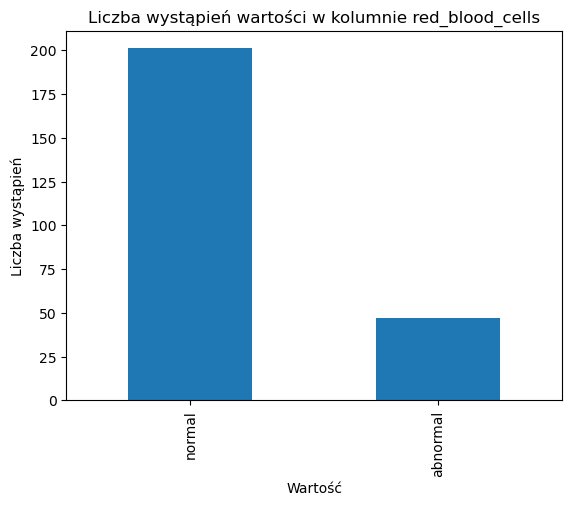

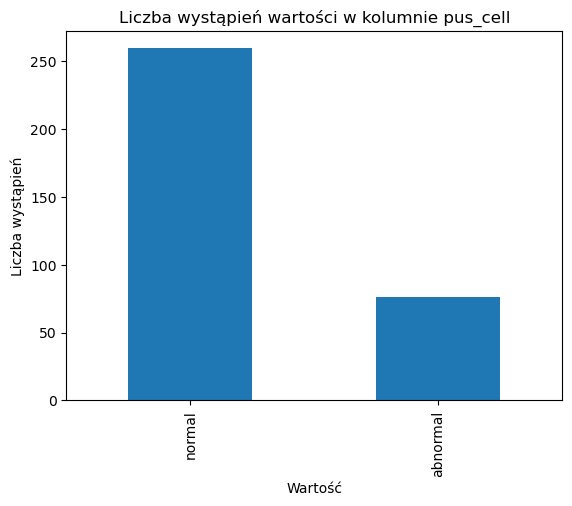

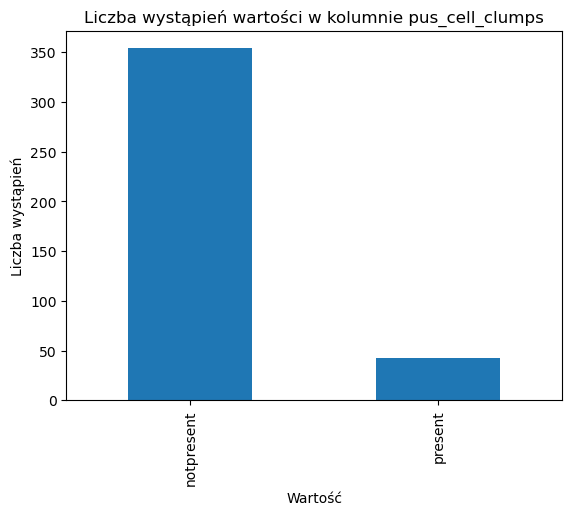

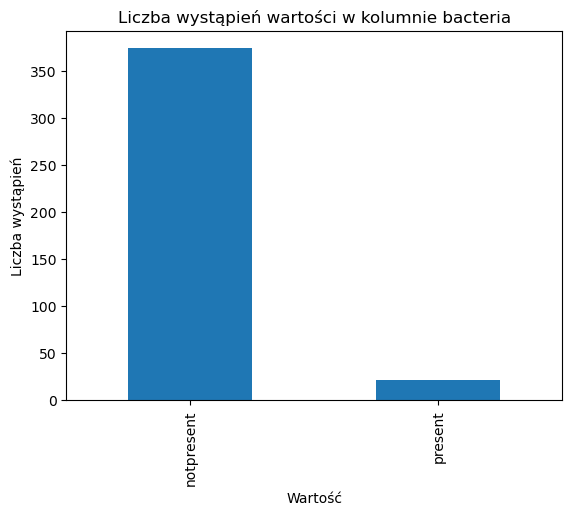

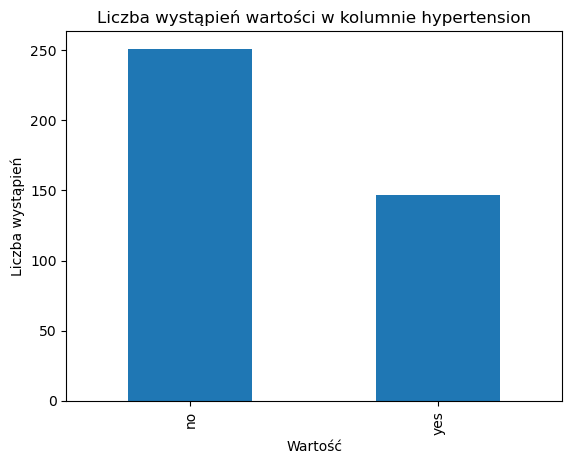

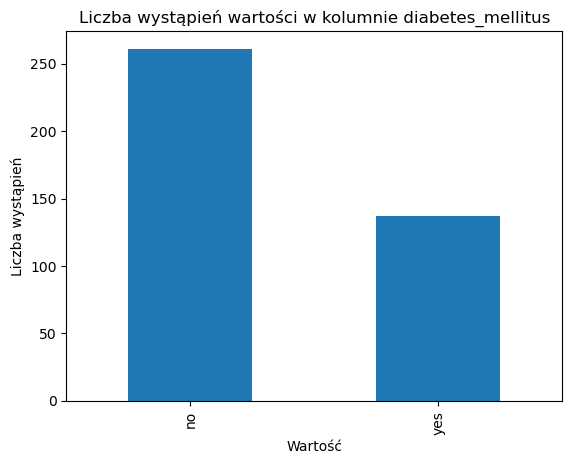

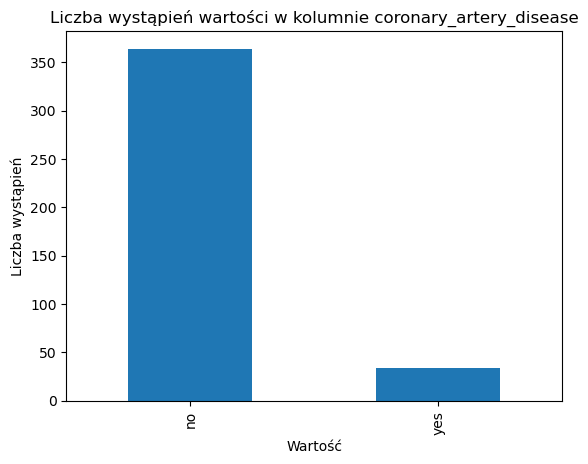

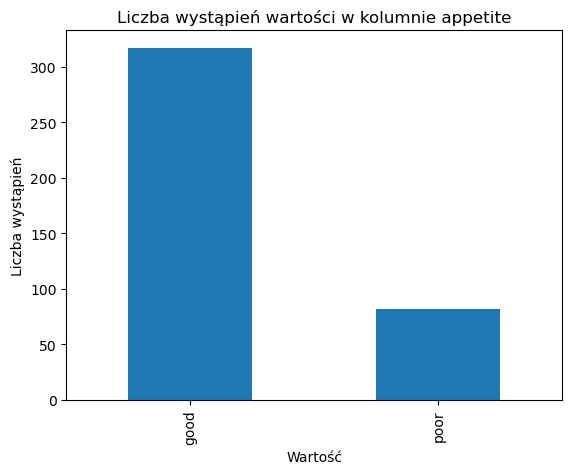

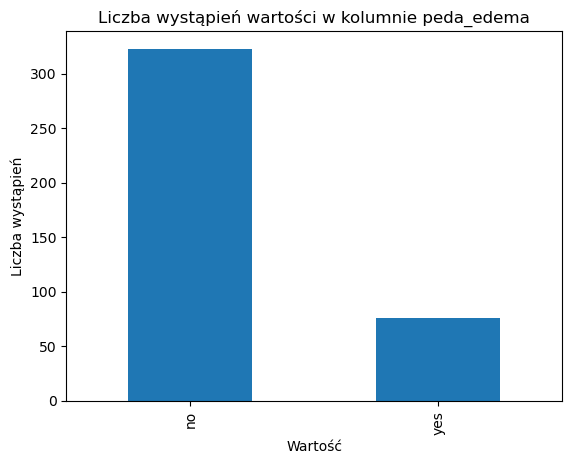

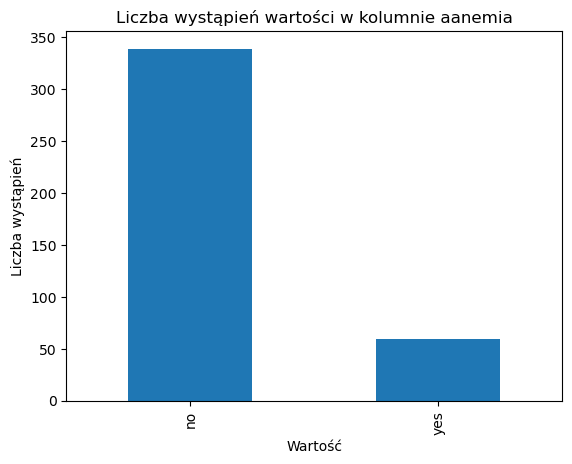

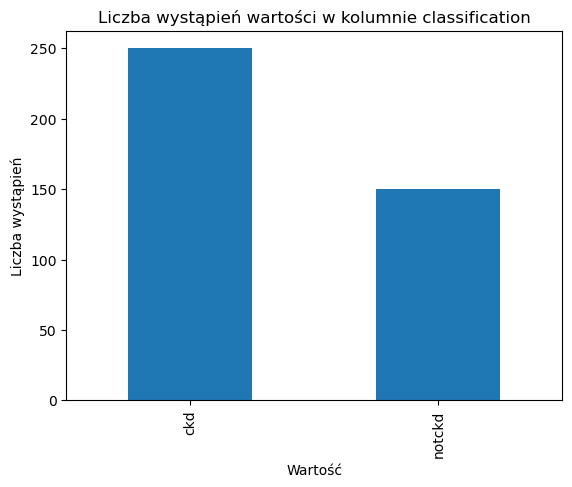

In [17]:
for c in df.columns:
    if df[c].dtype == "object":
        counts = df[c].value_counts()
        counts.plot(kind='bar')
        plt.title('Liczba wystąpień wartości w kolumnie ' + str(c))
        plt.xlabel('Wartość')
        plt.ylabel('Liczba wystąpień')
        plt.show()

In [18]:
df.replace({'normal': 0, 'abnormal': 1}, inplace=True)
df.replace({'notpresent': 0, 'present': 1}, inplace=True)
df.replace({'no': 0, 'yes': 1,'\tno': 0, '\tyes': 1, ' yes':1}, inplace=True)
df.replace({'poor': 0, 'good': 1}, inplace=True)
df.replace({'notckd': 0, 'ckd': 1, 'ckd\t': 1}, inplace=True)

In [19]:
showUnique(df) #Funkcja nic nie zwraca to znaczy, że nie ma juz zadnych kolumn z wartościami o typie object

In [20]:
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells            float64
pus_cell                   float64
pus_cell_clumps            float64
bacteria                   float64
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension               float64
diabetes_mellitus          float64
coronary_artery_disease    float64
appetite                   float64
peda_edema                 float64
aanemia                    float64
classification               int64
dtype: object

In [21]:
df.sample(10) #Nadal pozostaly wartosci null 

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,classification
272,56.0,80.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,139.0,...,42.0,5600.0,5.5,0.0,0.0,0.0,1.0,0.0,0.0,0
82,38.0,70.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,104.0,...,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0,1
248,59.0,70.0,1.010,1.0,3.0,1.0,1.0,0.0,0.0,424.0,...,37.0,10200.0,4.1,1.0,1.0,1.0,1.0,0.0,0.0,1
312,80.0,70.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,48.0,6300.0,6.1,0.0,0.0,0.0,1.0,0.0,0.0,0
13,68.0,70.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,98.0,...,NaN,NaN,NaN,1.0,1.0,1.0,0.0,1.0,0.0,1
131,5.0,50.0,1.010,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,36.0,12400.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
40,46.0,90.0,1.010,2.0,0.0,0.0,1.0,0.0,0.0,99.0,...,32.0,9100.0,4.1,1.0,0.0,0.0,1.0,0.0,0.0,1
357,66.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,107.0,...,42.0,11000.0,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0
274,19.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,107.0,...,44.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0
171,83.0,70.0,1.020,3.0,0.0,0.0,0.0,0.0,0.0,102.0,...,26.0,12800.0,3.1,1.0,0.0,0.0,0.0,0.0,1.0,1


In [22]:
df.isnull().sum().sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
classification               0
dtype: int64

In [23]:
#Funkcja zamienia NaN na srednia w danej kolumnie tylko gdy nie jest to kolumna zawierająca wartości binarne
def changeNanToAvg(df):
    for column in df.columns:
        if df[column].dtype != 'object':  
            if not all(value in (0, 1) for value in df[column].dropna()):  # Sprawdzanie, czy wartości nie są tylko 0 lub 1
                mean_value = df[column].mean()  # Średnia dla kolumny
                df[column] = df[column].fillna(mean_value)
changeNanToAvg(df)

In [24]:
df.isnull().sum().sort_values(ascending=False)

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
coronary_artery_disease      2
diabetes_mellitus            2
hypertension                 2
aanemia                      1
peda_edema                   1
appetite                     1
age                          0
packed_cell_volume           0
red_blood_cell_count         0
white_blood_cell_count       0
sodium                       0
haemoglobin                  0
potassium                    0
blood_pressure               0
serum_creatinine             0
blood_urea                   0
blood_glucose_random         0
sugar                        0
albumin                      0
specific_gravity             0
classification               0
dtype: int64

In [25]:
#Poniewaz reszta kolumn ma małą ilość wartości Null usuwam wiersze gdzie znajdja sie te wartosci (z 400 wierszy usunięte zostaje około 167)
df = df.dropna()
df['classification'].value_counts()

classification
0    135
1     98
Name: count, dtype: int64

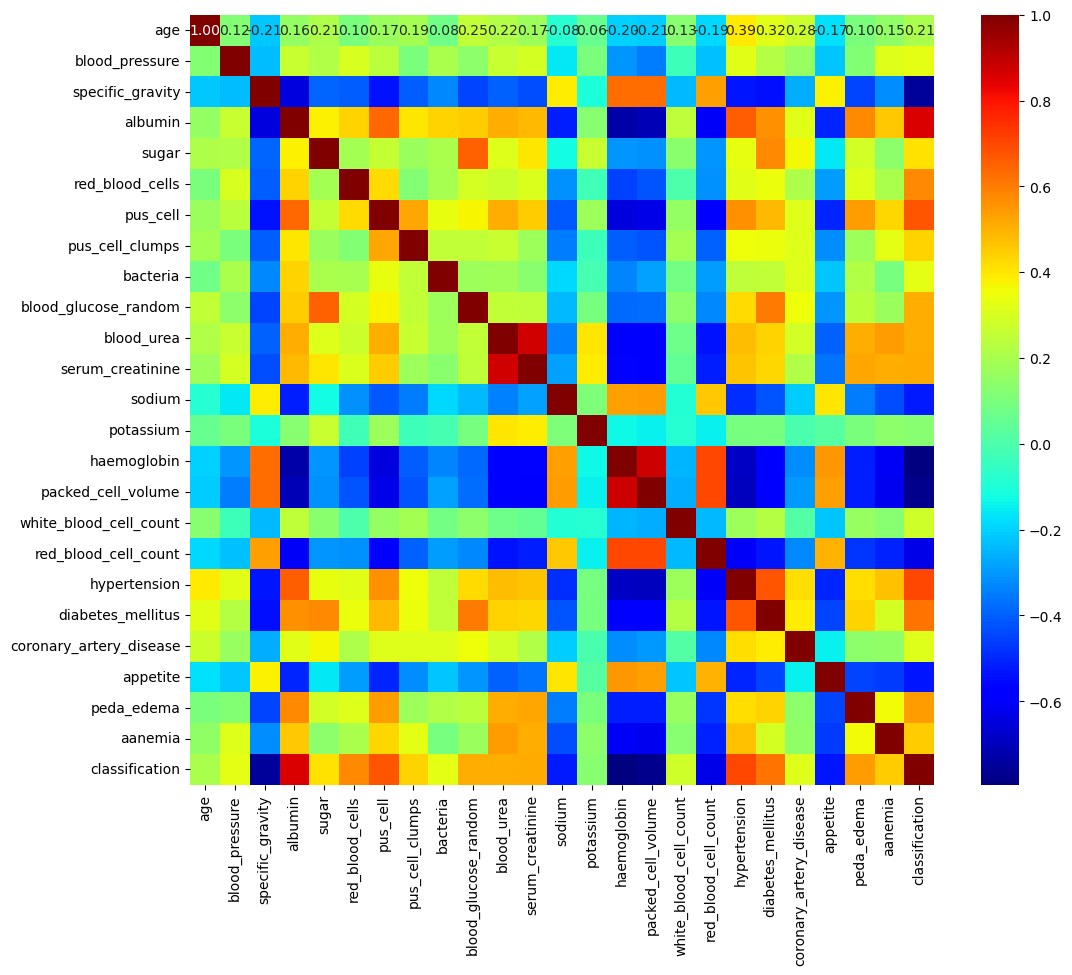

In [26]:
#Korelacje
df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True, cmap="jet",fmt='.2f')
plt.show()

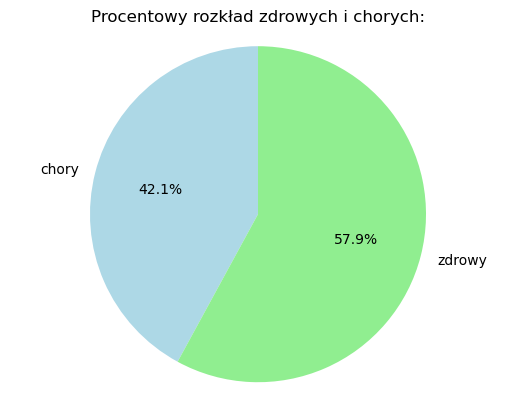

In [27]:
#Wykres stosunku chorych i zdrowych
ill = (df['classification'] == 1).sum()
healthy = (df['classification'] == 0).sum()
ill_percentage = (ill / len(df['classification'])) * 100
healthy_percentage = (healthy / len(df['classification'])) * 100
values = [ill, healthy]
plt.pie(values, labels=['chory', 'zdrowy'], colors=['lightblue', 'lightgreen'], autopct='%1.1f%%', startangle=90)
plt.title('Procentowy rozkład zdrowych i chorych:')
plt.axis('equal') 
plt.show()

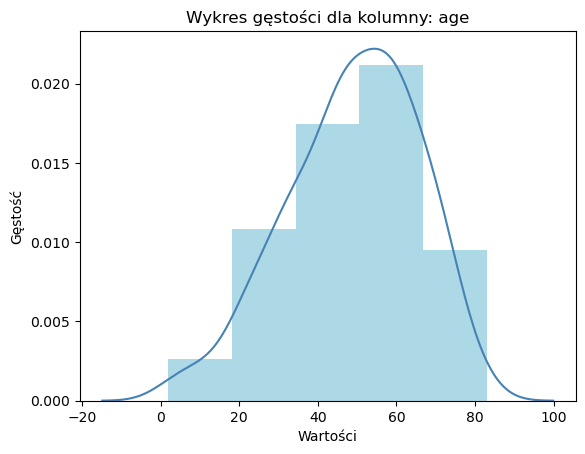

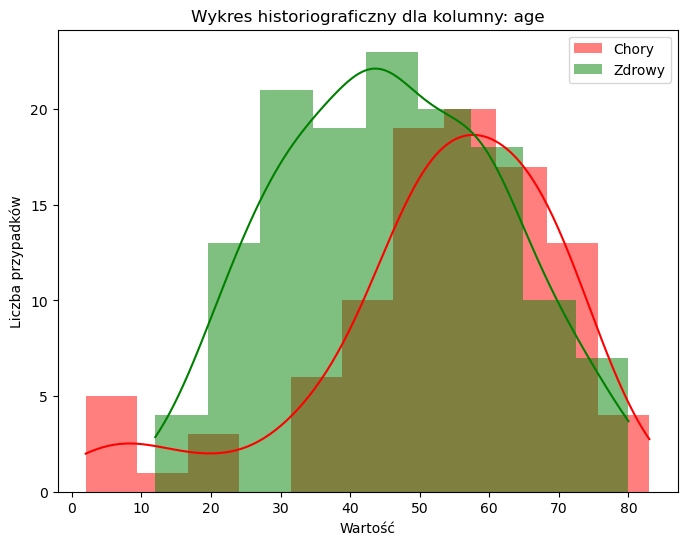

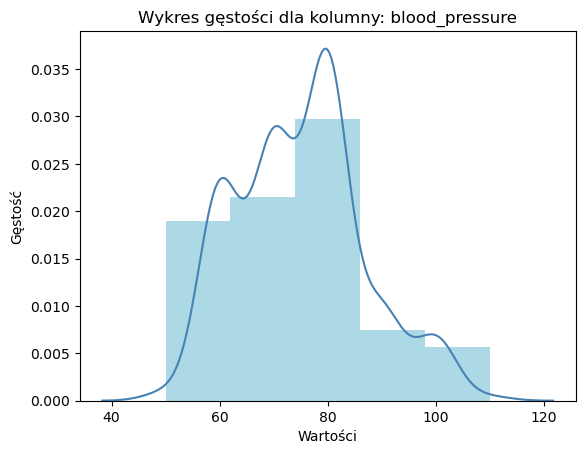

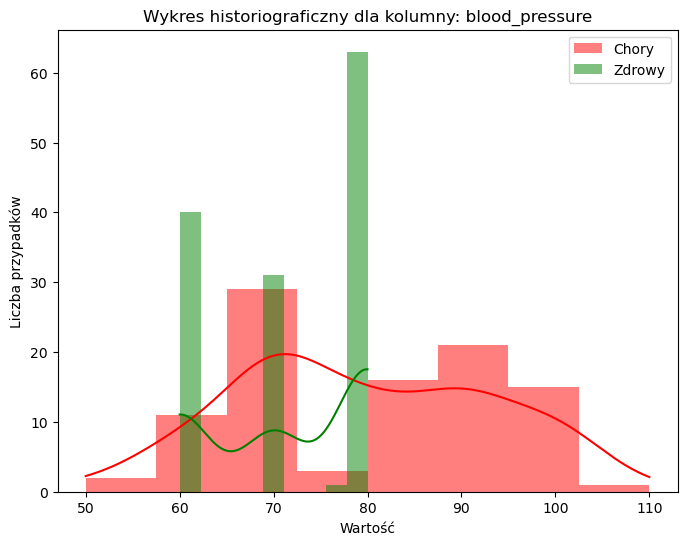

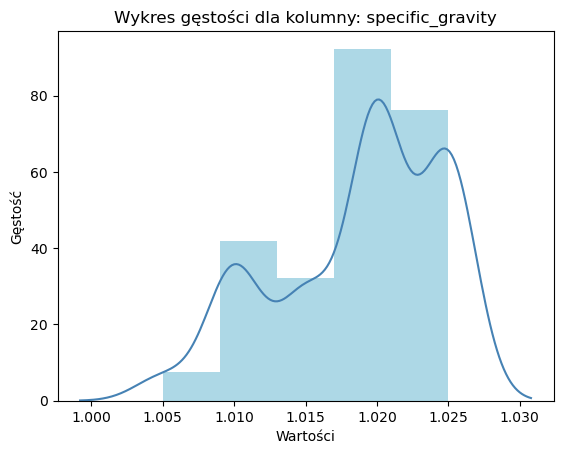

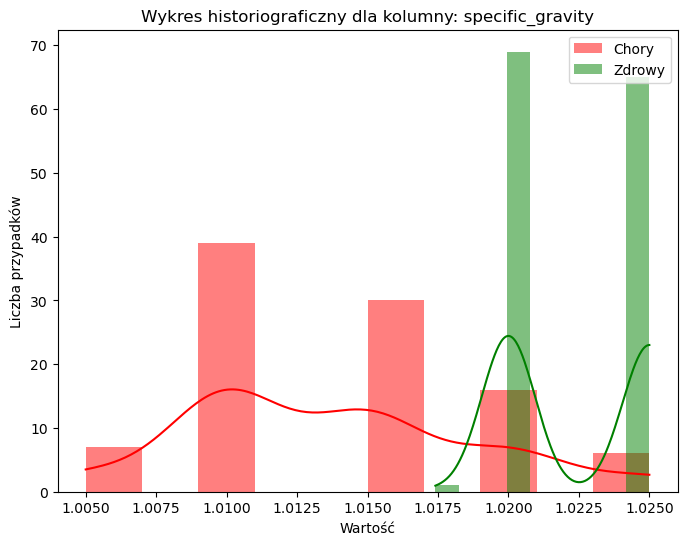

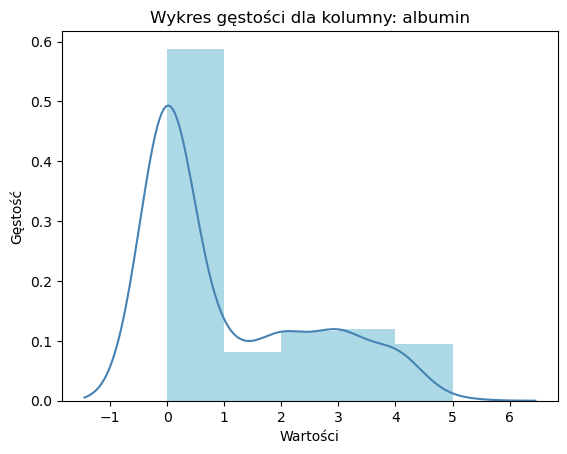

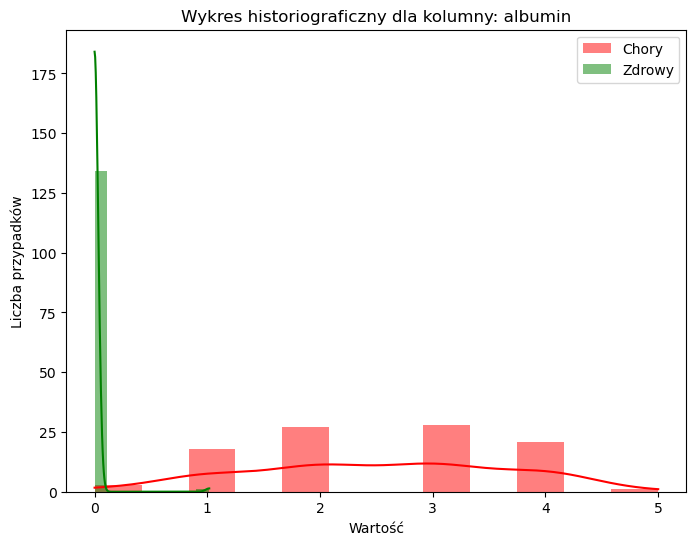

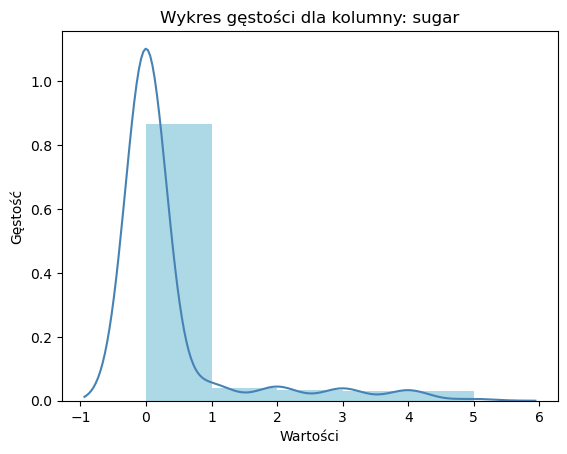

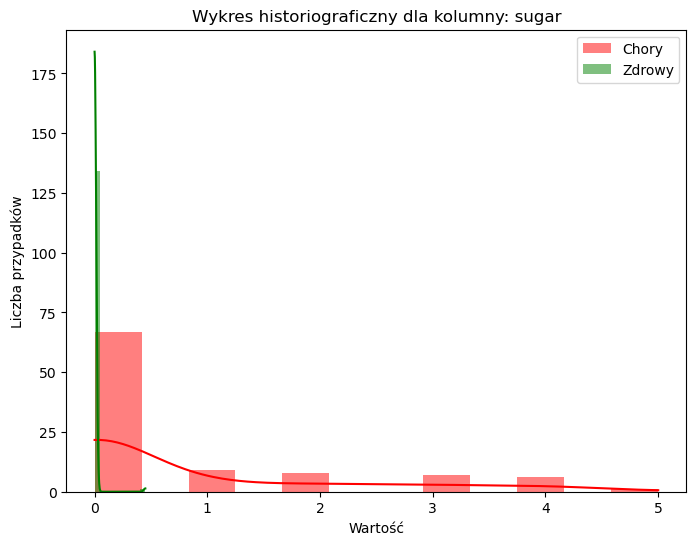

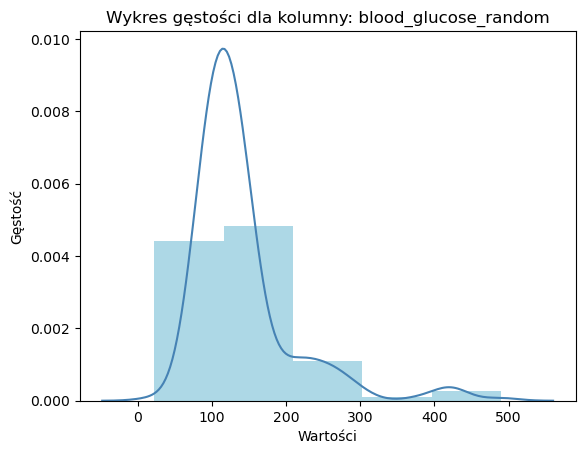

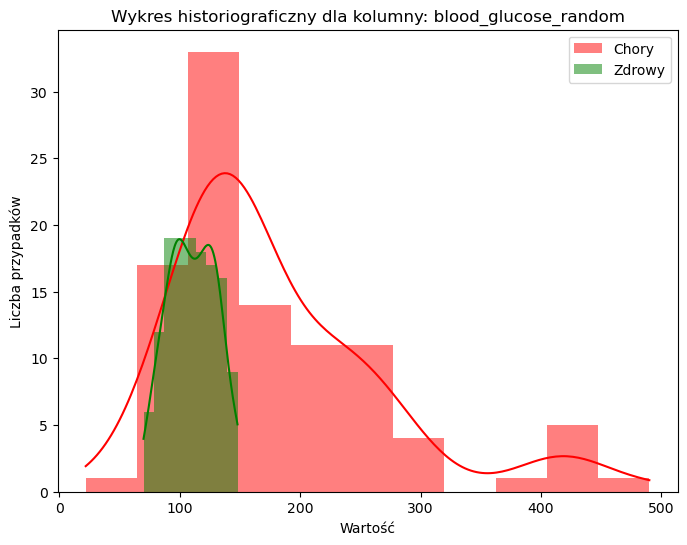

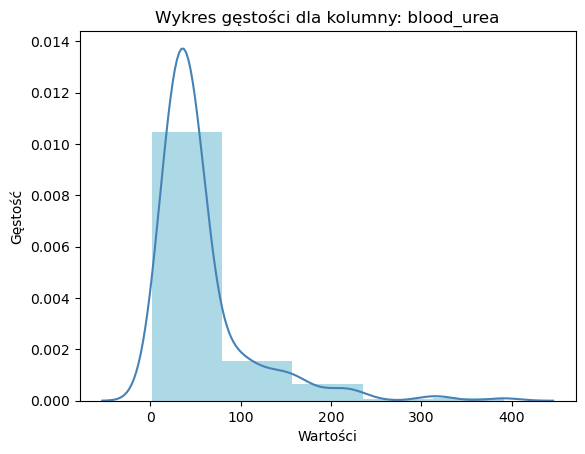

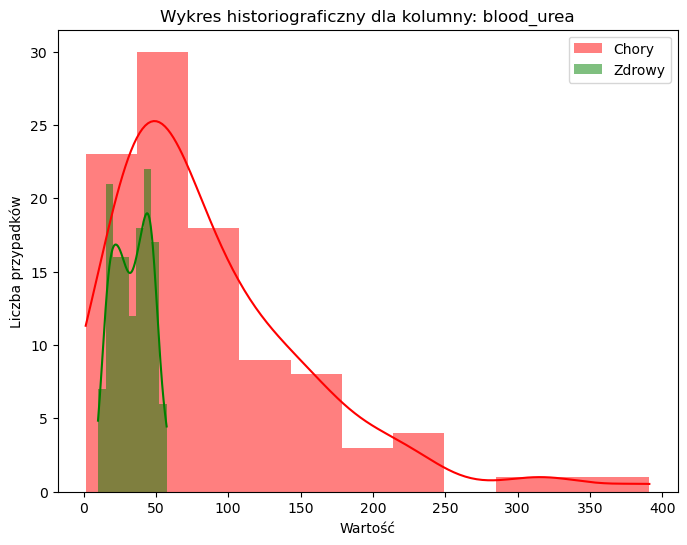

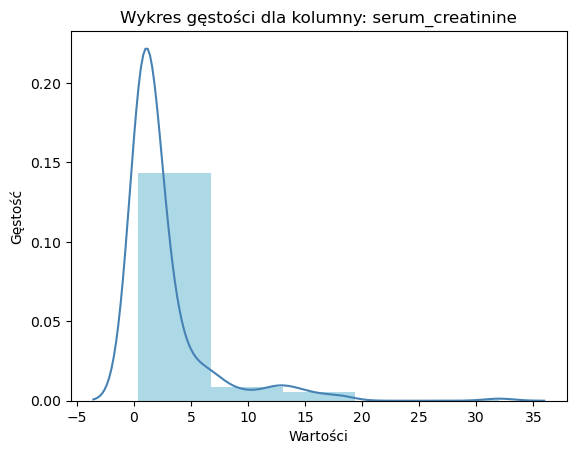

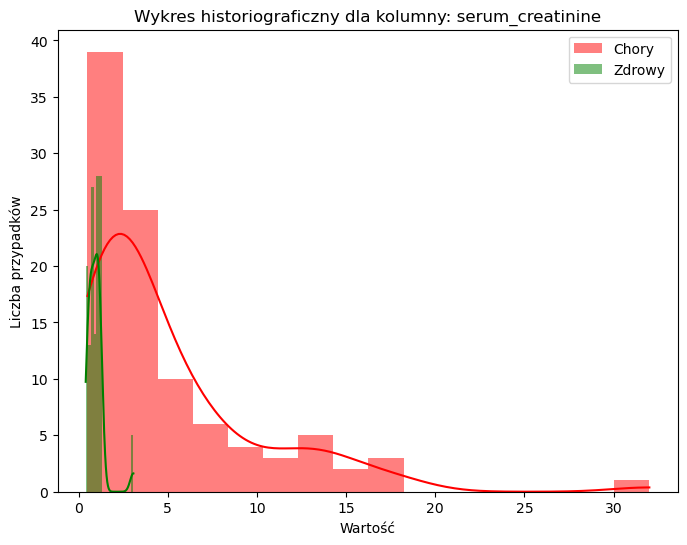

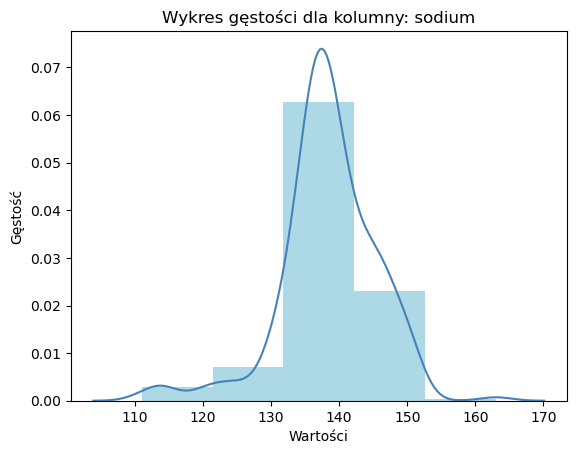

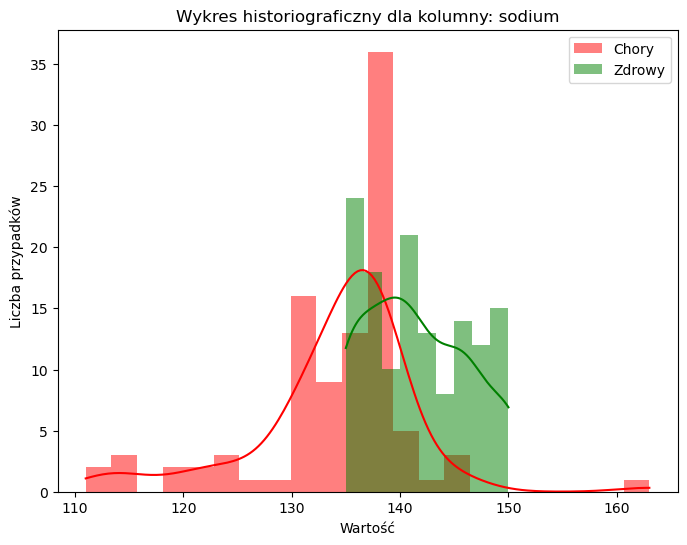

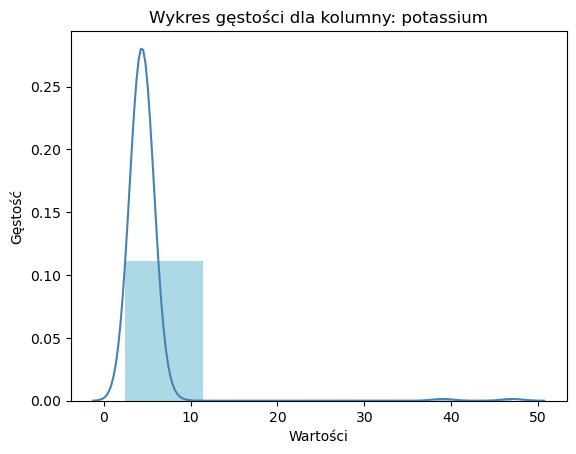

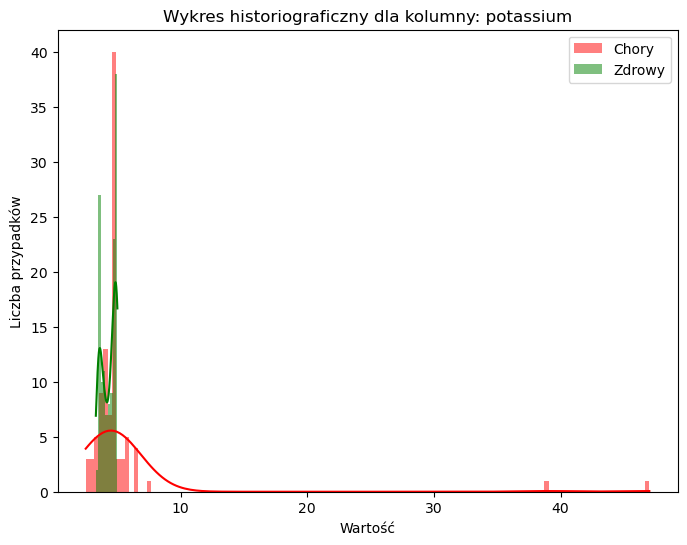

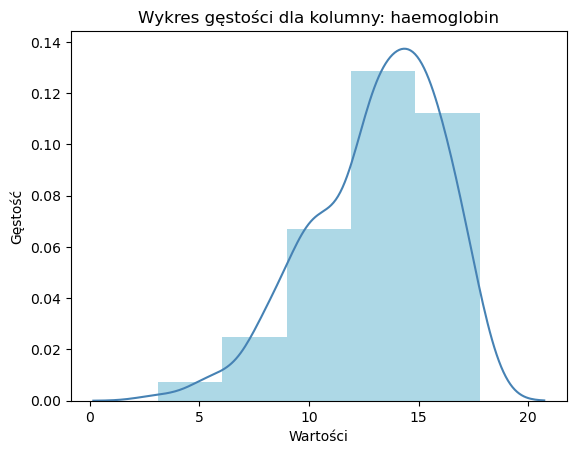

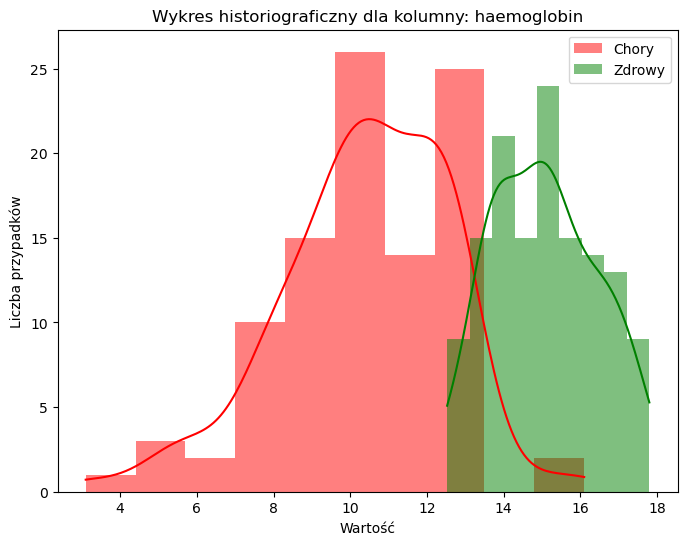

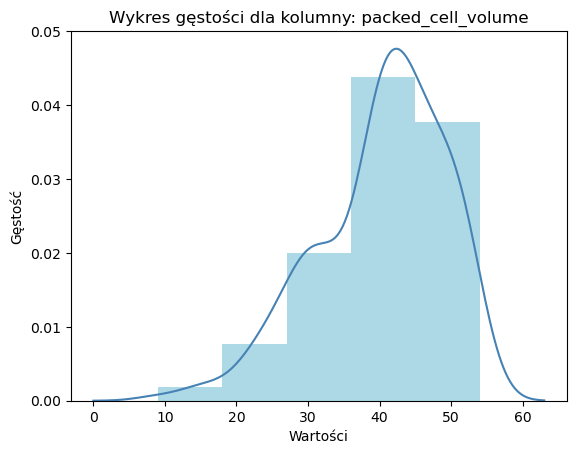

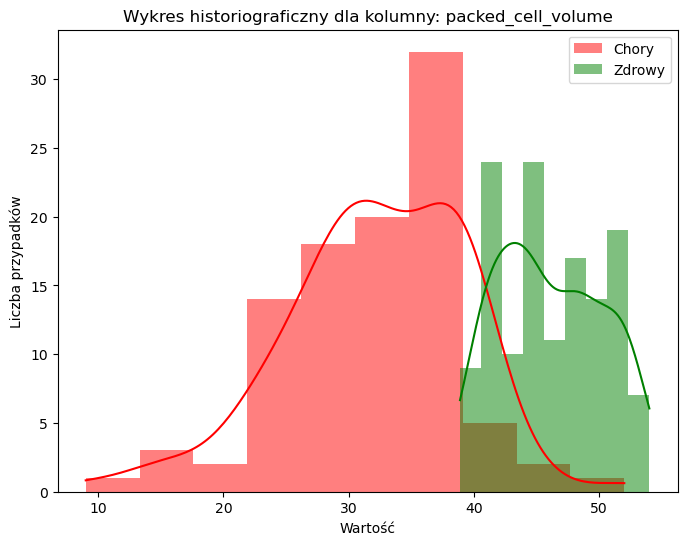

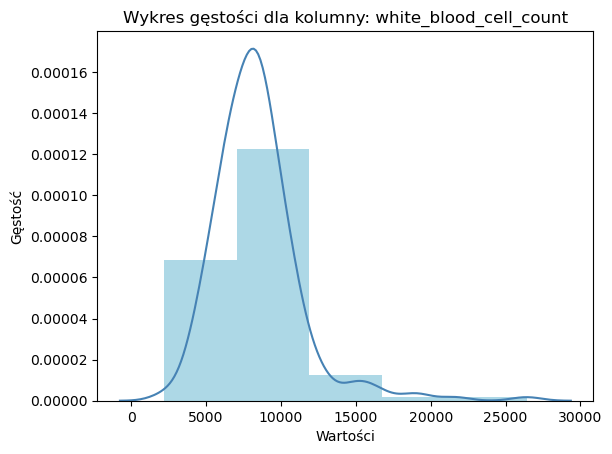

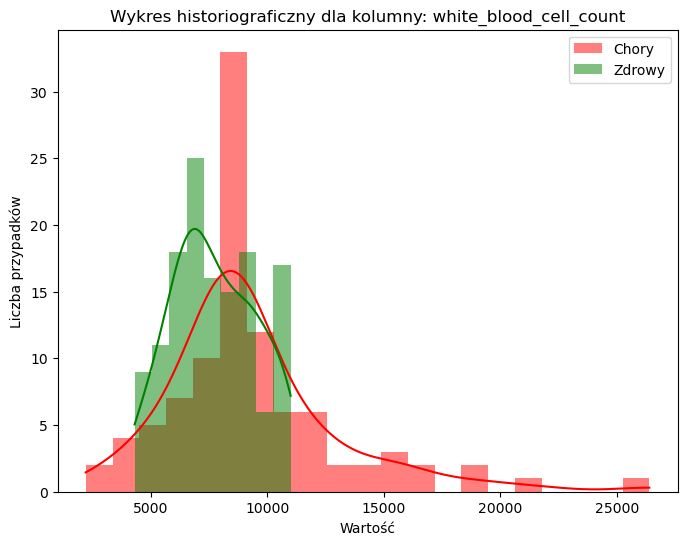

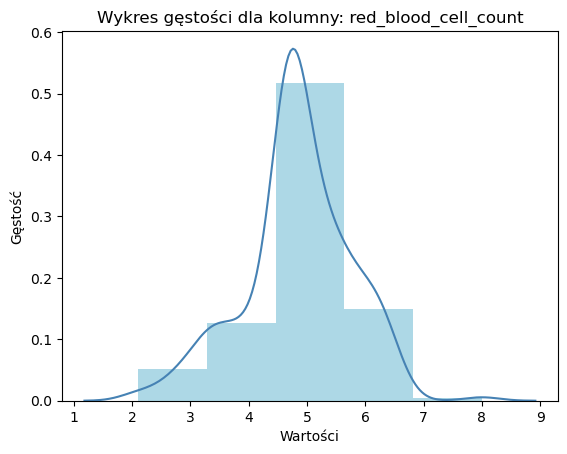

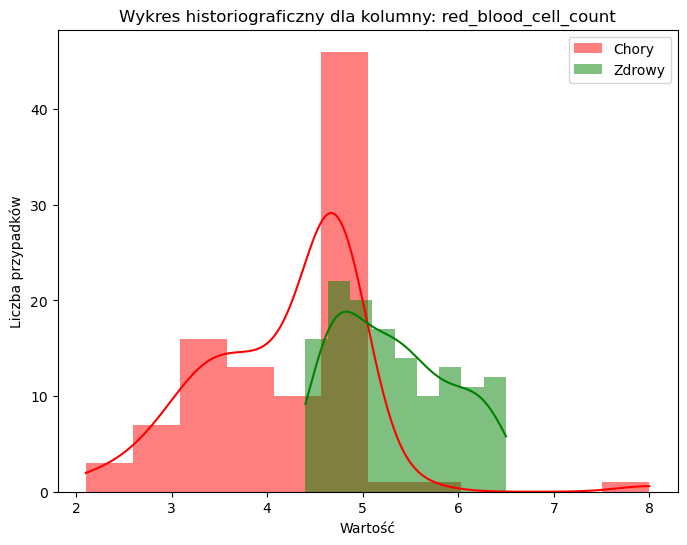

In [28]:
#wykresy histograficzne
for column in df.columns[:-1]:
    unique_values = df[column].unique()
    if len(unique_values) != 2 or set(unique_values) != {0, 1}:
        #Gęstość
        sns.kdeplot(df[column], color="steelblue") #linia trendu
        plt.hist(df[column], density=True, bins=5, color='lightblue') #słupki
        plt.xlabel('Wartości')
        plt.ylabel('Gęstość')
        plt.title('Wykres gęstości dla kolumny: ' + column)
        plt.show()
        #Wykres historiograficzny
        plt.figure(figsize=(8, 6))
        sns.histplot(df[column][df['classification'] == 1], color='red', label='Chory', kde=True, element="step", linewidth=0)
        sns.histplot(df[column][df['classification'] == 0], color='green', label='Zdrowy', kde=True, element="step", linewidth=0)
        plt.title('Wykres historiograficzny dla kolumny: ' + column)
        plt.xlabel('Wartość')
        plt.ylabel('Liczba przypadków')
        plt.legend()
        plt.show()

In [29]:
#TO trzeba jeszcze sprawdzic bo niektore stad odpadna 
import random
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.utils import shuffle

#Podstawowe funkcje do normalizacji i standaryzacji
class DataProc:
    def NormalizeMinMax(x): #Normalizacja
        x_copy = x.copy()
        for c in x_copy.iloc[:, :-1]:
            x_copy[c] = (x_copy[c] - x_copy[c].min()) / (x_copy[c].max() - x_copy[c].min())
        return x_copy
    def StandardizeZScore(x): #Standaryzacja
        x_copy = x.copy()
        for c in x_copy.iloc[:, :-1]:
            mean = x_copy[c].mean()
            std = x_copy[c].std()
            x_copy[c] = (x_copy[c] - mean) / std
        return x_copy

In [30]:
#Głowna funkcja do obslugi KNN z roznymi metrykami i cross_val
def evaluate_knn_with_metric(X, y, metric="euclidean", weight=False, cv=5):
    best_k = None
    best_scores = 0.0
    best_accuracy = 0.0
    best_precisions = 0.0
    best_recall = 0.0
    best_f1 = 0.0
    best_std_score = 0.0
    best_confusion_matrix = None
    scores = []
    k_values = [i for i in range(2,31)]
    for k in k_values:
        if weight == False:
            knn_lib = KNeighborsClassifier(n_neighbors=k, metric=metric)
        else:
            knn_lib = KNeighborsClassifier(n_neighbors=k, metric=metric, weights='distance')
        cv_score = cross_val_score(knn_lib, X, y, cv=cv, scoring='accuracy')
        cv_prec = cross_val_score(knn_lib, X, y, cv=cv, scoring='precision')
        cv_recall = cross_val_score(knn_lib, X, y, cv=cv, scoring='recall')
        cv_f1 = cross_val_score(knn_lib, X, y, cv=cv, scoring='f1')
        avg_score = np.mean(cv_score)
        std_score = cv_score.std()
        scores.append(avg_score)
        if avg_score > best_accuracy and (k%2==1):
            best_accuracy = avg_score
            best_k = k
            best_scores = cv_score
            best_precisions = cv_prec
            best_recalls = cv_recall
            best_f1 = cv_f1
            best_std_score = std_score
            best_confusion_matrix = confusion_matrix(y, cross_val_predict(knn_lib, X, y, cv=cv))
    #Rysowanie wykresu
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=range(2, 31), y=scores, marker='o')
    plt.xlabel("K Values")
    plt.ylabel("Accuracy Score")
    plt.title("Accuracy Score vs. K Values ({} metric)".format(metric))
    plt.show()
    print("Dla metryki: {} najlepsze K to: {} dokładność wynosi dla niego: {:.2f} z odchyleniem standardowym {:.2f}".format(metric, best_k, round(best_accuracy, 2), round(best_std_score, 2)))
    
    return [metric, best_k, best_accuracy, best_scores, best_precisions, best_recalls, best_f1, best_std_score, best_confusion_matrix]
def precision_recall(model, X, y, cv):
    y_pred = cross_val_predict(model, X, y, cv=cv)
    report = classification_report(y, y_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    return precision, recall
def split(df):
    df_copy = df.copy()
    y = df_copy.pop('classification')
    X = df_copy
    X_shuffled, y_shuffled = shuffle(X, y, random_state=44)
    return X_shuffled, y_shuffled
def plot_accuracy(scores):
    metrics = [item[0] + " k=" +  str(item[1]) for item in scores]
    accuracies = [item[2] for item in scores]
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(metrics, accuracies, color='skyblue')
    plt.xlabel('Metryka wraz z najlepszym K')
    plt.ylabel('Dokładność')
    plt.title('Dokładność dla różnych metryk i najlepszych dla nich wartości K')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)
    #Najlepsze opcje dla kazdego bedzie kolorowal na pomaranczowo
    best_accuracy = max(accuracies)
    for i, bar in enumerate(bars):
        if accuracies[i] == best_accuracy:
            bar.set_color('orange')
    plt.show()
def select_best(all_data):
    best_accuracy = 0.0
    best_data = None
    for data in all_data:
        accuracy = data[2]
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_data = data
    return best_data
def print_stats(data):
    print("Statystyki dla poszczególnych foldów dla metryki: " + str(data[0]) + " o k=" + str(data[1]))
    selected_data = [data[3],data[4],data[5],data[6]]
    df = pd.DataFrame(selected_data, columns=["Fold1", "Fold2", "Fold3","Fold4","Fold5"])
    df = df.rename(index={ 0: "Accuracy", 1: "Precision", 2: "Recall", 3: "F1"})
    return df
def plot_confusion_matrix(data):
    metric_name = data[0]
    best_k = data[1]
    accuracy = data[2]
    confusion_matrix_data = data[8]
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix_data, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title("Confusion Matrix - {} metric (Best K = {}, Accuracy = {:.2f})".format(metric_name, best_k, accuracy))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
def draw_summary_data_frame(data_dict):
    df = pd.DataFrame.from_dict(data_dict, orient='index', columns=['Metric', 'K', 'Accuracy', 'Best_scores', 'Best_precisions', 'Best_recalls', 'Best_f1', 'Standard Deviation', 'Best_confusion_matrix'])
    df['Accuracy'] = (df['Accuracy'] * 100).round(2)
    df['Standard Deviation'] = (df['Standard Deviation'] * 100).round(2)
    df['Accuracy_numeric'] = df['Accuracy'] / 100  # Dodanie dodatkowej kolumny z wartościami numerycznymi
    df['Standard Deviation_numeric'] = df['Standard Deviation'] / 100  # Dodanie dodatkowej kolumny z wartościami numerycznymi
    df.drop(columns=[ 'Best_scores', 'Best_precisions', 'Best_recalls', 'Best_f1','Metric','K', 'Best_confusion_matrix'],inplace=True)
    df = df.sort_values(by=['Accuracy_numeric', 'Standard Deviation_numeric'], ascending=[False, True])  # Sortowanie względem Accuracy malejąco i po std rosnąco
    df['Accuracy'] = df['Accuracy'].astype(str) + '%'  # Konwersja zwrotna do formatu procentowego
    df['Standard Deviation'] = df['Standard Deviation'].astype(str) + '%'  # Konwersja zwrotna do formatu procentowego
    df.drop(columns=['Accuracy_numeric', 'Standard Deviation_numeric'], inplace=True)  # Usunięcie dodatkowych kolumn numerycznych
    return df
    
metrics = ["euclidean", "chebyshev", "cosine", "canberra"]
knn_results = {}

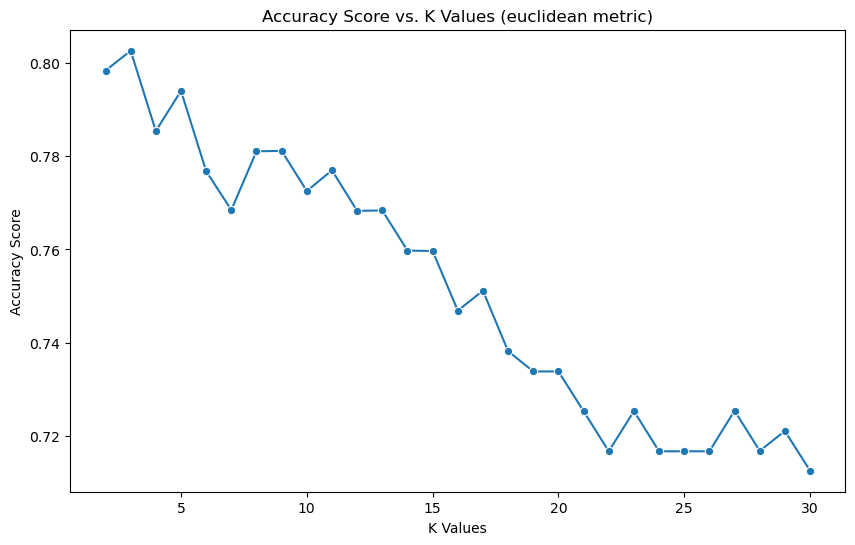

Dla metryki: euclidean najlepsze K to: 3 dokładność wynosi dla niego: 0.80 z odchyleniem standardowym 0.02


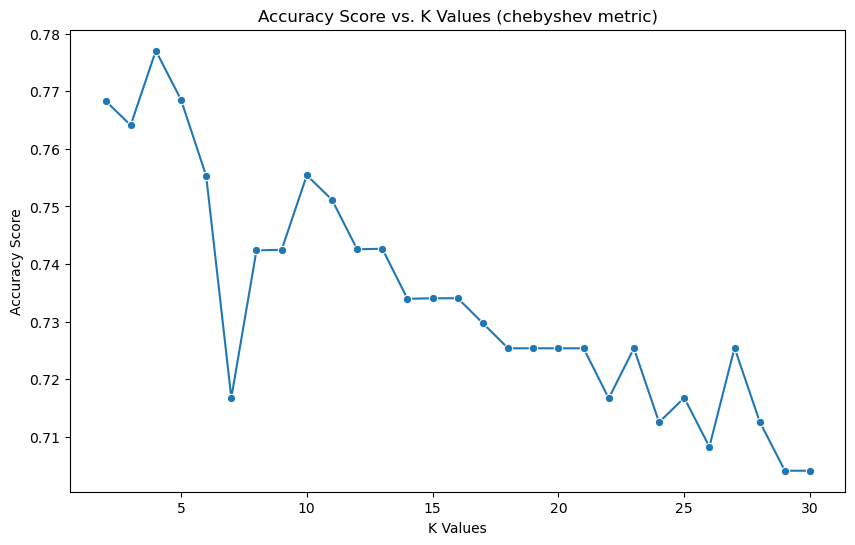

Dla metryki: chebyshev najlepsze K to: 5 dokładność wynosi dla niego: 0.77 z odchyleniem standardowym 0.05


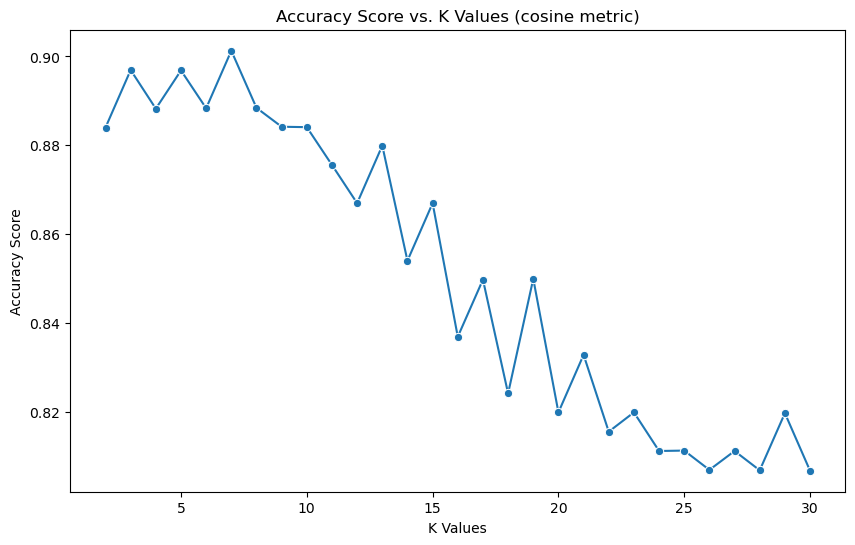

Dla metryki: cosine najlepsze K to: 7 dokładność wynosi dla niego: 0.90 z odchyleniem standardowym 0.02


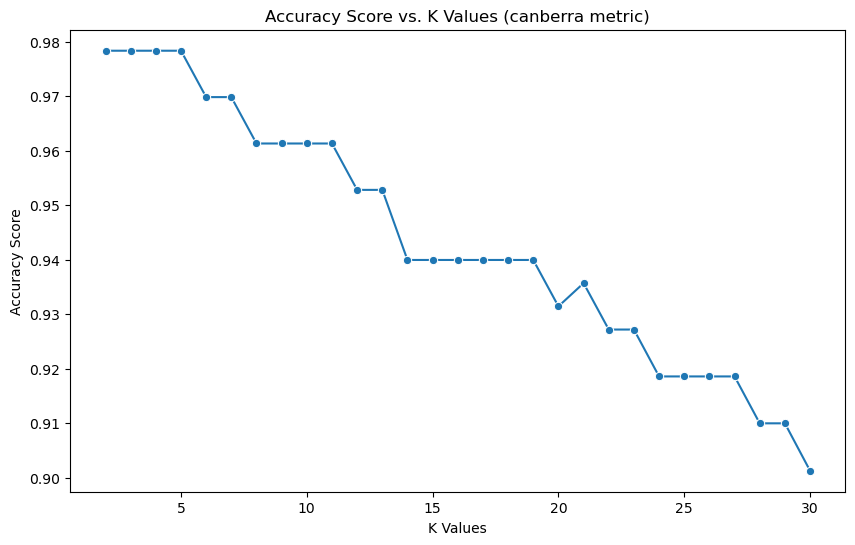

Dla metryki: canberra najlepsze K to: 3 dokładność wynosi dla niego: 0.98 z odchyleniem standardowym 0.02


In [31]:
#Dane nieznormalizowane testy dla roznych metryk
X, y = split(df)
all_data = []
for metric in metrics:
    res = evaluate_knn_with_metric(X, y, metric=metric)
    all_data.append(res)
    knn_results['KNN bez normalizacji ' + res[0] + " k=" + str(res[1])] = res

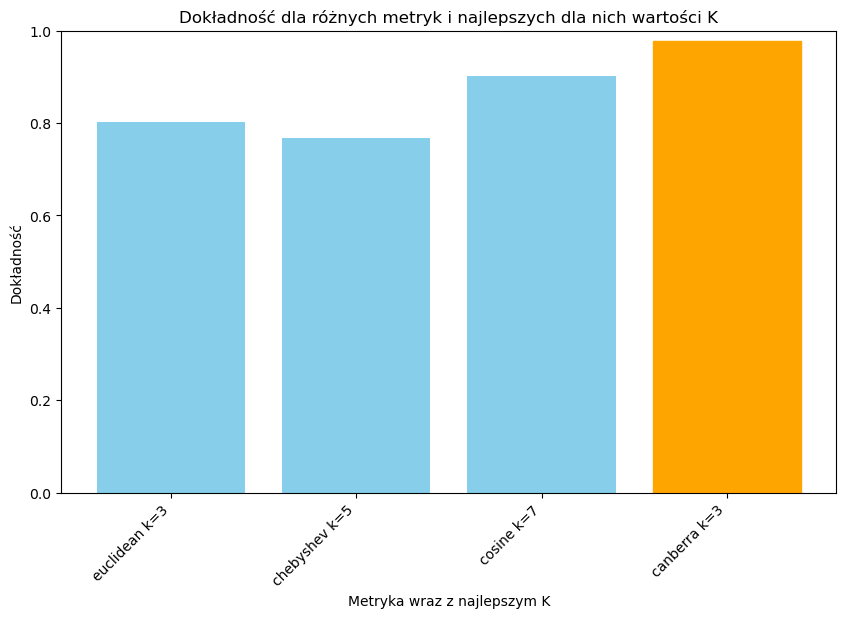

In [32]:
plot_accuracy(all_data)

In [33]:
print_stats(select_best(all_data))

Statystyki dla poszczególnych foldów dla metryki: canberra o k=3


,Fold1,Fold2,Fold3,Fold4,Fold5
Accuracy,1.0,1.0,0.978723,0.956522,0.956522
Precision,1.0,1.0,1.000000,1.000000,1.000000
Recall,1.0,1.0,0.950000,0.894737,0.894737
F1,1.0,1.0,0.974359,0.944444,0.944444


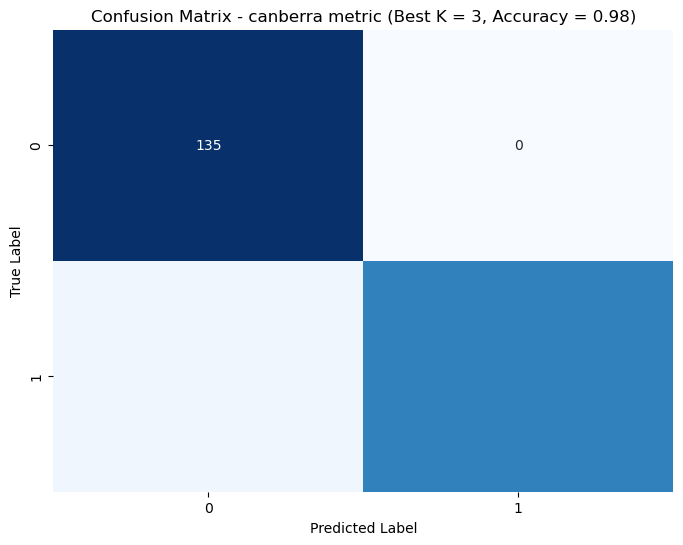

In [34]:
#Jest to suma wartości TP,FP,TN,FN z wszystkich foldów 
plot_confusion_matrix(select_best(all_data))

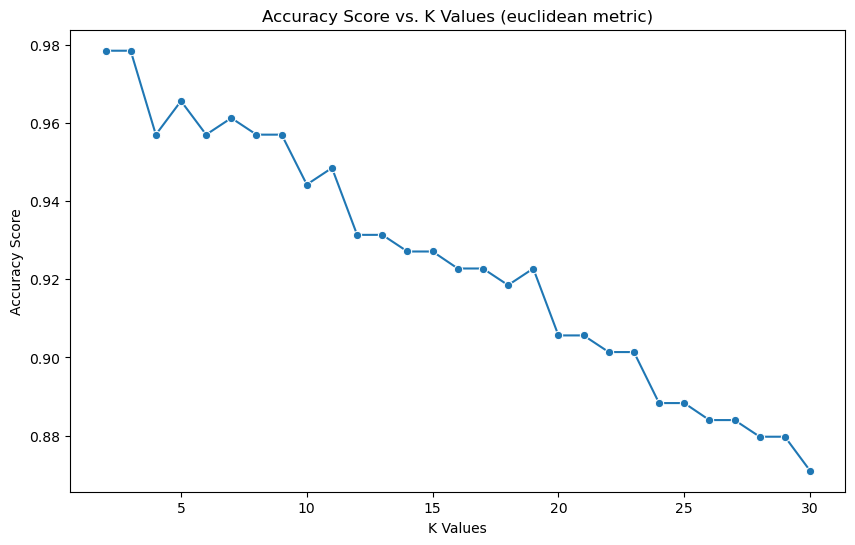

Dla metryki: euclidean najlepsze K to: 3 dokładność wynosi dla niego: 0.98 z odchyleniem standardowym 0.01


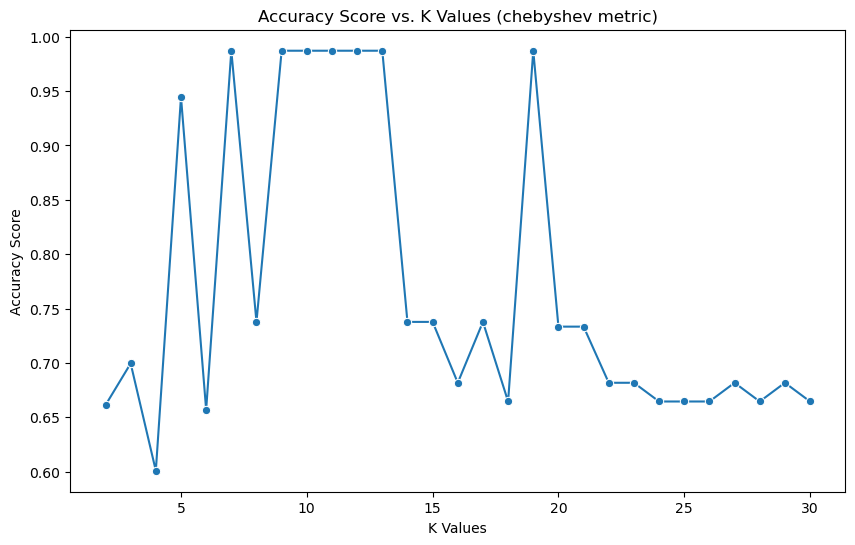

Dla metryki: chebyshev najlepsze K to: 7 dokładność wynosi dla niego: 0.99 z odchyleniem standardowym 0.02


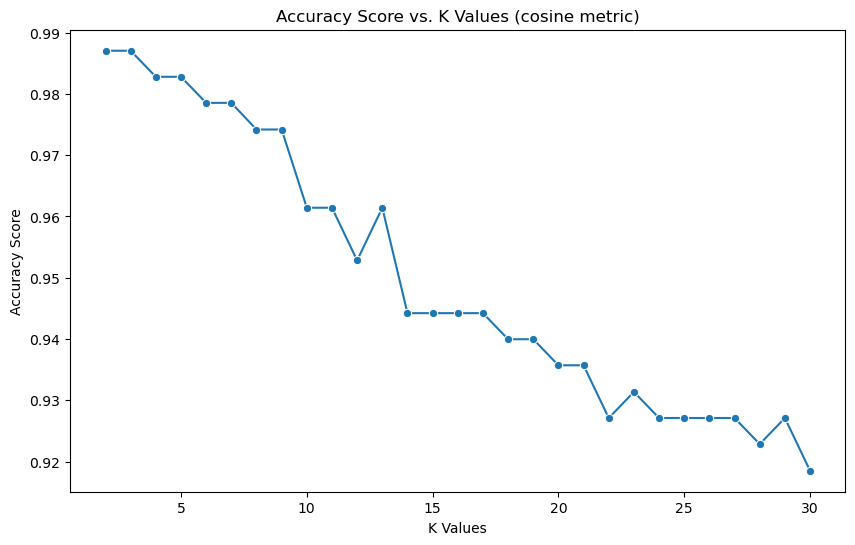

Dla metryki: cosine najlepsze K to: 3 dokładność wynosi dla niego: 0.99 z odchyleniem standardowym 0.02


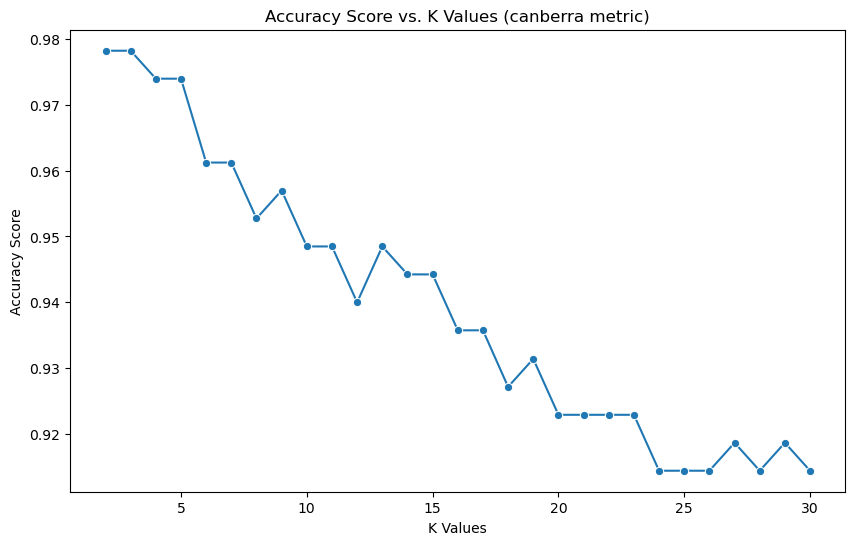

Dla metryki: canberra najlepsze K to: 3 dokładność wynosi dla niego: 0.98 z odchyleniem standardowym 0.03


In [35]:
#Dane znormalizowane min-max dla roznych metryk
df_norm = DataProc.NormalizeMinMax(df.copy())
X_norm, y_norm = split(df_norm)
all_data = []
for metric in metrics:
    res = evaluate_knn_with_metric(X_norm, y_norm, metric=metric)
    all_data.append(res)
    knn_results['KNN znormalizowany ' + res[0] + " k=" + str(res[1])] = res

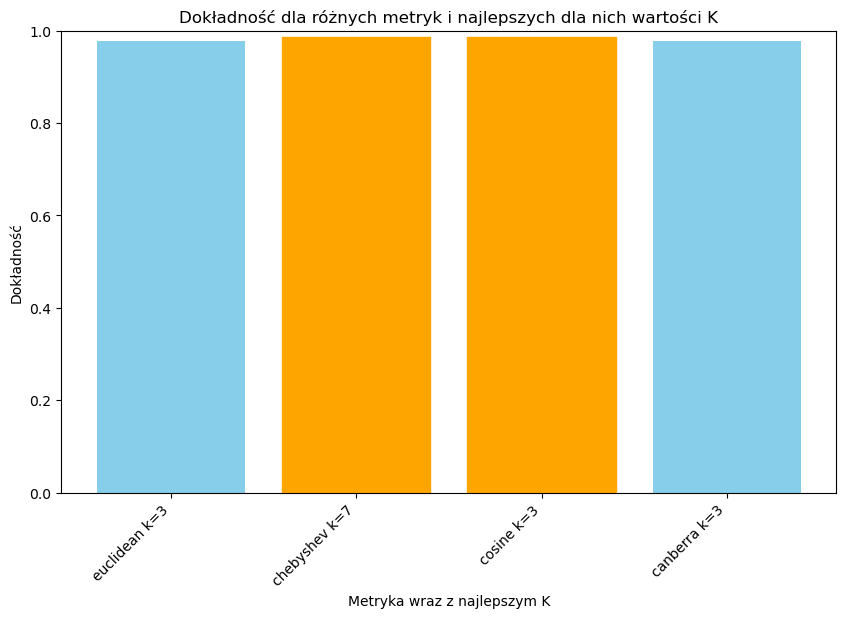

In [36]:
plot_accuracy(all_data)

In [37]:
print_stats(select_best(all_data))

Statystyki dla poszczególnych foldów dla metryki: chebyshev o k=7


,Fold1,Fold2,Fold3,Fold4,Fold5
Accuracy,1.0,1.0,0.978723,1.0,0.956522
Precision,1.0,1.0,1.000000,1.0,1.000000
Recall,1.0,1.0,0.950000,1.0,0.894737
F1,1.0,1.0,0.974359,1.0,0.944444


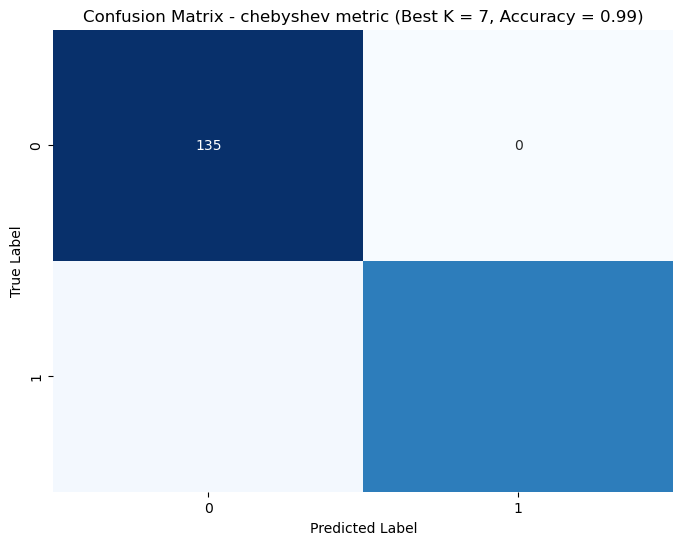

In [38]:
plot_confusion_matrix(select_best(all_data))

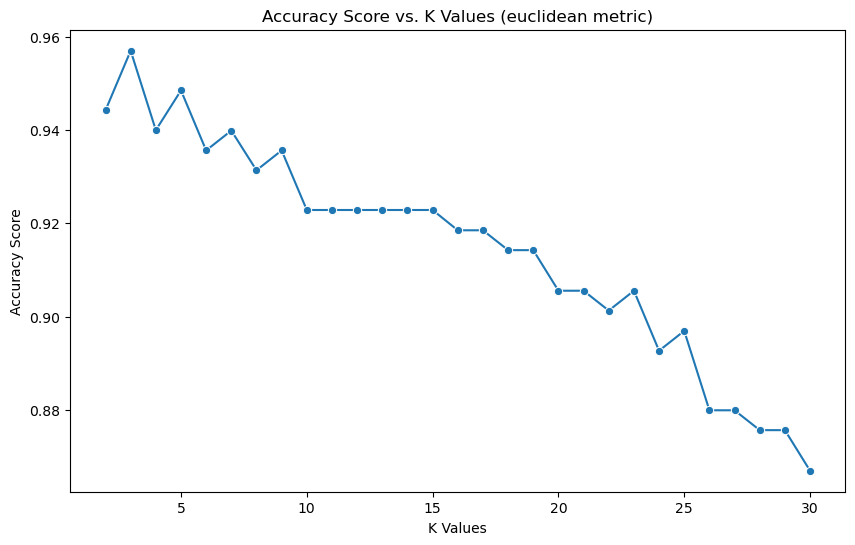

Dla metryki: euclidean najlepsze K to: 3 dokładność wynosi dla niego: 0.96 z odchyleniem standardowym 0.02


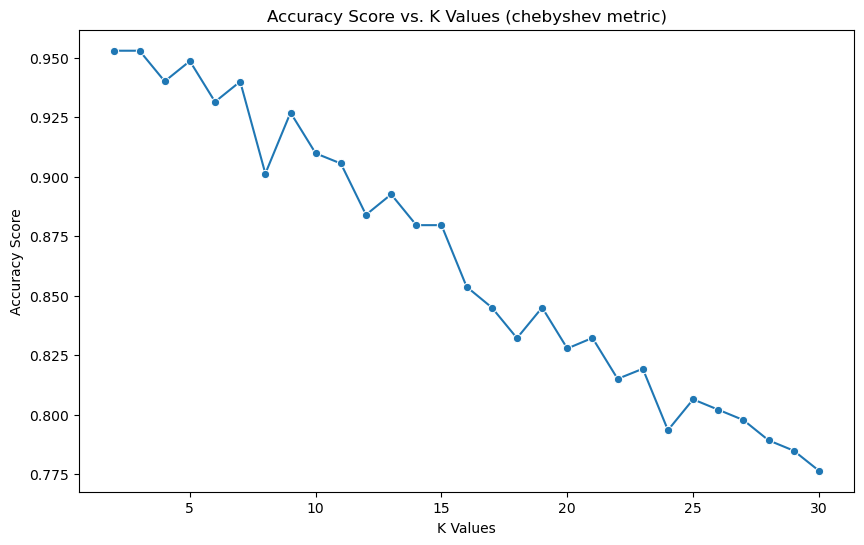

Dla metryki: chebyshev najlepsze K to: 3 dokładność wynosi dla niego: 0.95 z odchyleniem standardowym 0.02


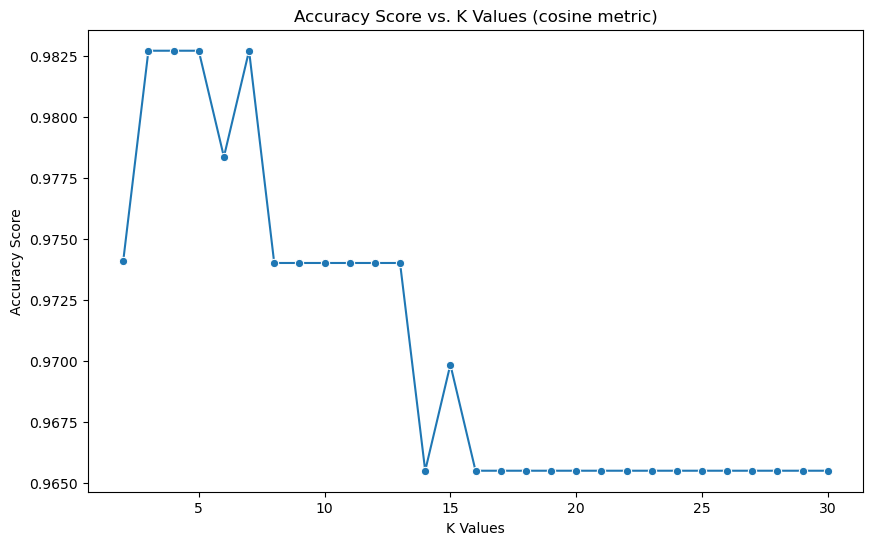

Dla metryki: cosine najlepsze K to: 7 dokładność wynosi dla niego: 0.98 z odchyleniem standardowym 0.02


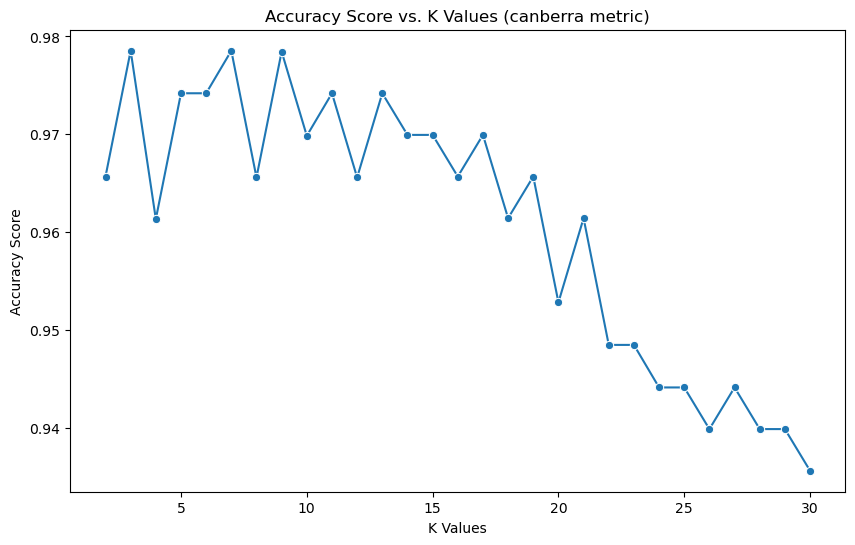

Dla metryki: canberra najlepsze K to: 3 dokładność wynosi dla niego: 0.98 z odchyleniem standardowym 0.01


In [39]:
#Dane ustandaryzowane (Z-score normalization) dla roznych metryk
df_stand = DataProc.StandardizeZScore(df.copy())
X_stand, y_stand = split(df_stand)
all_data = []
for metric in metrics:
    res =evaluate_knn_with_metric(X_stand, y_stand, metric=metric)
    all_data.append(res)
    knn_results['KNN ustandaryzowany ' + res[0] + " k=" + str(res[1])] = res

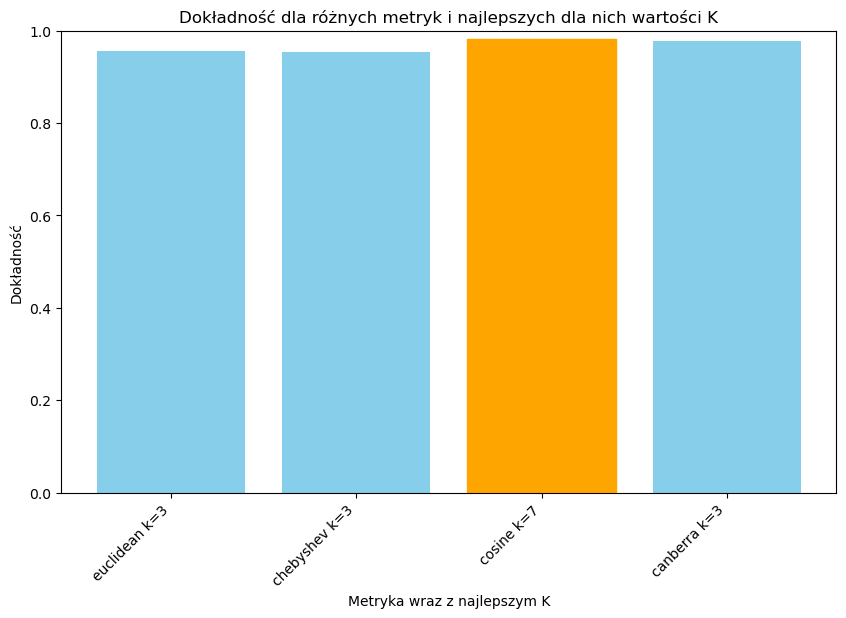

In [40]:
plot_accuracy(all_data)

In [41]:
print_stats(select_best(all_data))

Statystyki dla poszczególnych foldów dla metryki: cosine o k=7


,Fold1,Fold2,Fold3,Fold4,Fold5
Accuracy,0.978723,1.0,1.0,0.956522,0.978261
Precision,1.000000,1.0,1.0,1.000000,1.000000
Recall,0.950000,1.0,1.0,0.894737,0.947368
F1,0.974359,1.0,1.0,0.944444,0.972973


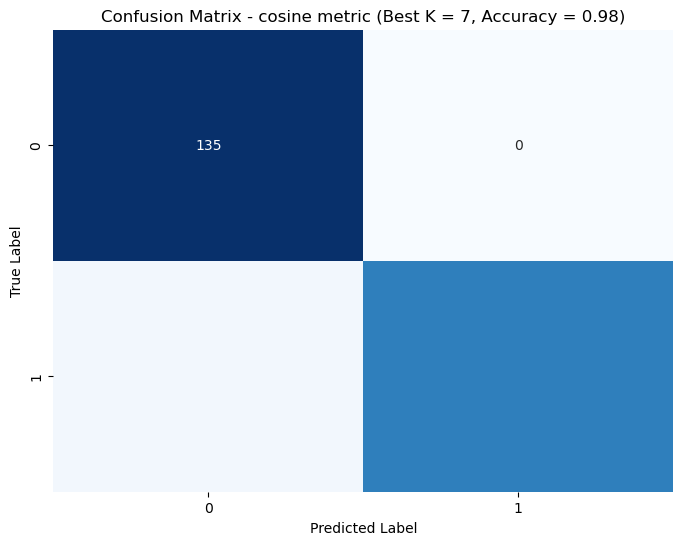

In [42]:
plot_confusion_matrix(select_best(all_data))

In [43]:
#Przy okazji sprawdzam czy standaryzacja dziala ok, jak widac tak bo średnia jest dla kazdej kolumny bliska 0, a odchylenie 1
df_stand.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,classification
count,2.330000e+02,2.330000e+02,2.330000e+02,2.330000e+02,2.330000e+02,2.330000e+02,233.000000,233.000000,2.330000e+02,2.330000e+02,...,2.330000e+02,2.330000e+02,2.330000e+02,2.330000e+02,2.330000e+02,233.000000,2.330000e+02,2.330000e+02,2.330000e+02,233.000000
mean,-9.148619e-17,-3.964402e-16,2.195669e-15,-1.219816e-16,-1.524770e-16,9.148619e-17,0.000000,0.000000,-3.049540e-17,-1.524770e-16,...,6.099079e-17,2.134678e-16,1.219816e-16,6.099079e-17,-6.099079e-17,0.000000,9.148619e-17,-9.148619e-17,-6.099079e-17,0.420601
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,0.494718
min,-2.805434e+00,-2.148378e+00,-2.395180e+00,-7.338528e-01,-3.480955e-01,-4.881950e-01,-0.574462,-0.368781,-2.799391e-01,-1.700693e+00,...,-3.505989e+00,-2.108758e+00,-3.004230e+00,-5.942466e-01,-5.282207e-01,-0.270954,-2.191869e+00,-4.611130e-01,-3.836000e-01,0.000000
25%,-6.514639e-01,-4.328787e-01,-6.525008e-01,-7.338528e-01,-3.480955e-01,-4.881950e-01,-0.574462,-0.368781,-2.799391e-01,-5.797177e-01,...,-5.891362e-01,-5.761077e-01,-3.696078e-01,-5.942466e-01,-5.282207e-01,-0.270954,4.542735e-01,-4.611130e-01,-3.836000e-01,0.000000
50%,6.652617e-02,1.220057e-01,2.188386e-01,-7.338528e-01,-3.480955e-01,-4.881950e-01,-0.574462,-0.368781,-2.799391e-01,-2.635451e-01,...,8.398376e-02,4.978918e-03,-1.418941e-01,-5.942466e-01,-5.282207e-01,-0.270954,4.542735e-01,-4.611130e-01,-3.836000e-01,0.000000
75%,7.246838e-01,4.248708e-01,1.090178e+00,6.561954e-01,-3.480955e-01,-4.881950e-01,-0.574462,-0.368781,-2.799391e-01,1.106383e-01,...,7.571037e-01,3.775416e-01,6.183757e-01,1.675581e+00,-5.282207e-01,-0.270954,4.542735e-01,-4.611130e-01,-3.836000e-01,1.000000
max,2.040999e+00,2.998119e+00,1.090178e+00,2.741268e+00,5.026728e+00,2.039570e+00,1.733289,2.700001,3.556874e+00,5.025161e+00,...,1.542410e+00,6.133496e+00,3.472550e+00,1.675581e+00,1.885023e+00,3.674819,4.542735e-01,2.159358e+00,2.595694e+00,1.000000


In [44]:
#Dla normalizacji podobnie tylko tym razem wartosci min max są w przedziale 0 do 1
df_norm.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,classification
count,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,...,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000
mean,0.578866,0.417445,0.687212,0.211173,0.064764,0.193133,0.248927,0.120172,0.072961,0.252859,...,0.694475,0.255847,0.463846,0.261803,0.218884,0.068670,0.828326,0.175966,0.128755,0.420601
std,0.206337,0.194307,0.286915,0.287760,0.186053,0.395606,0.433322,0.325862,0.260633,0.148680,...,0.198083,0.121326,0.154398,0.440562,0.414380,0.253436,0.377909,0.381611,0.335650,0.494718
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.444444,0.333333,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,...,0.577778,0.185950,0.406780,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.592593,0.441151,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.213675,...,0.711111,0.256451,0.441938,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.728395,0.500000,1.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.269309,...,0.844444,0.301653,0.559322,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


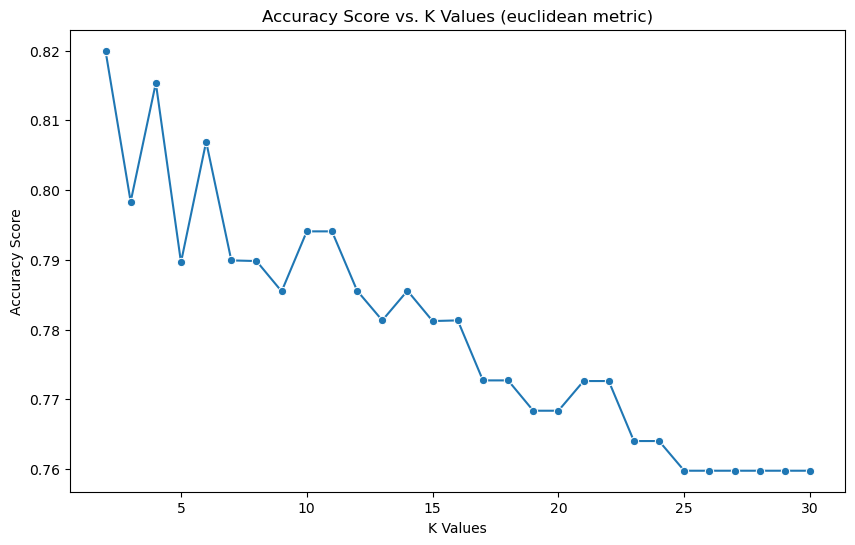

Dla metryki: euclidean najlepsze K to: 3 dokładność wynosi dla niego: 0.80 z odchyleniem standardowym 0.02


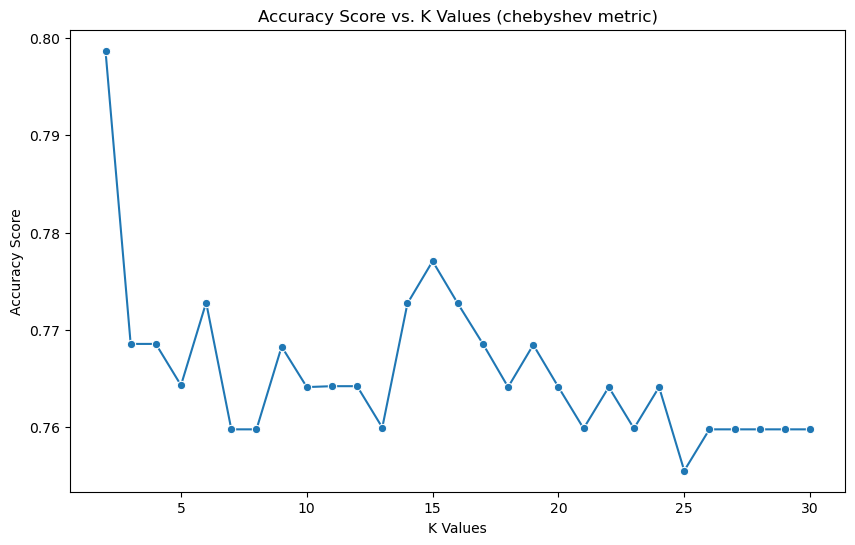

Dla metryki: chebyshev najlepsze K to: 15 dokładność wynosi dla niego: 0.78 z odchyleniem standardowym 0.04


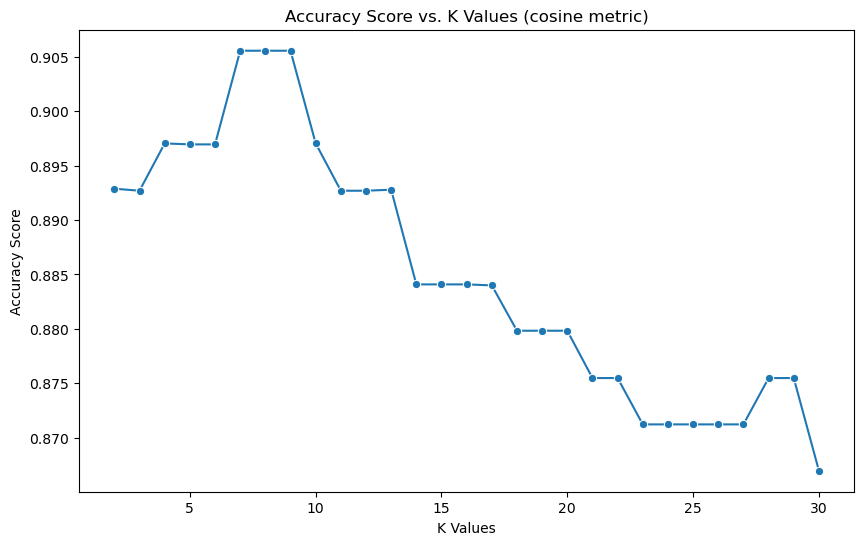

Dla metryki: cosine najlepsze K to: 7 dokładność wynosi dla niego: 0.91 z odchyleniem standardowym 0.02


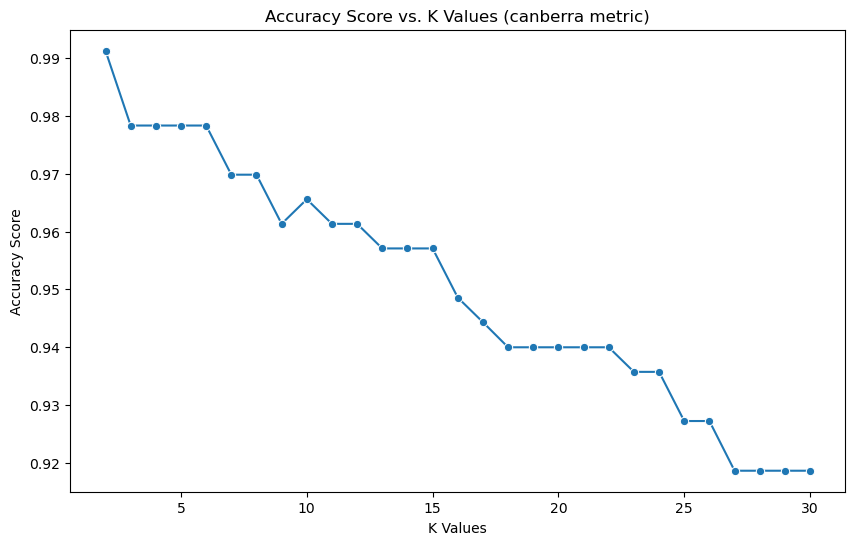

Dla metryki: canberra najlepsze K to: 3 dokładność wynosi dla niego: 0.98 z odchyleniem standardowym 0.02


In [45]:
#Tutaj z uwzglednieniem wag: ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of 
#a query point will have a greater influence than neighbors which are further away.
#Dane nieznormalizowane testy dla roznych metryk
all_data = []
for metric in metrics:
    res = evaluate_knn_with_metric(X, y, metric=metric, weight=True)
    all_data.append(res)
    knn_results['KNN bez normalizacji z wagami ' + res[0] + " k=" + str(res[1])] = res

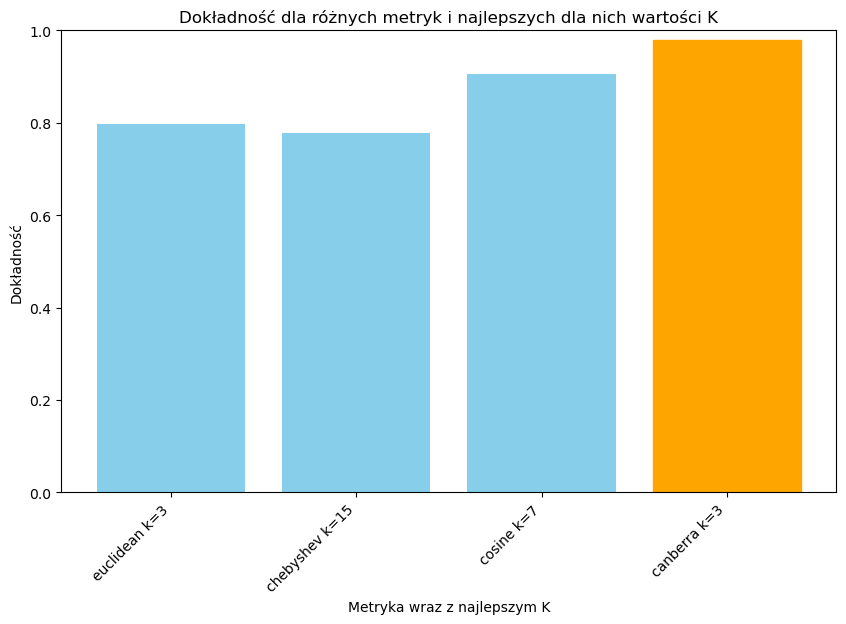

In [46]:
plot_accuracy(all_data)

In [47]:
print_stats(select_best(all_data))

Statystyki dla poszczególnych foldów dla metryki: canberra o k=3


,Fold1,Fold2,Fold3,Fold4,Fold5
Accuracy,1.0,1.0,0.978723,0.956522,0.956522
Precision,1.0,1.0,1.000000,1.000000,1.000000
Recall,1.0,1.0,0.950000,0.894737,0.894737
F1,1.0,1.0,0.974359,0.944444,0.944444


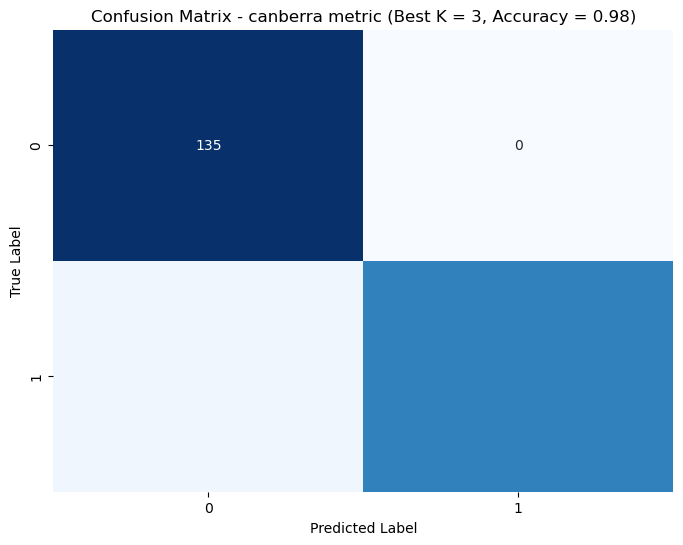

In [48]:
plot_confusion_matrix(select_best(all_data))

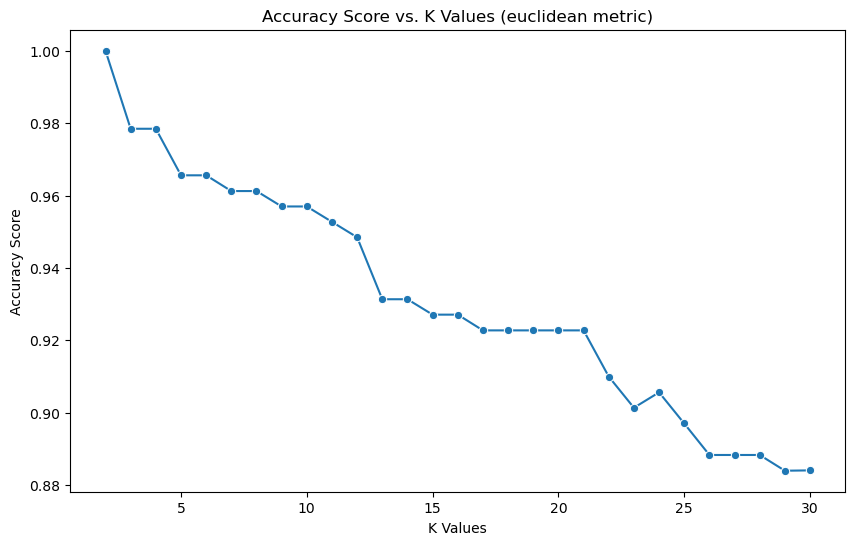

Dla metryki: euclidean najlepsze K to: 3 dokładność wynosi dla niego: 0.98 z odchyleniem standardowym 0.01


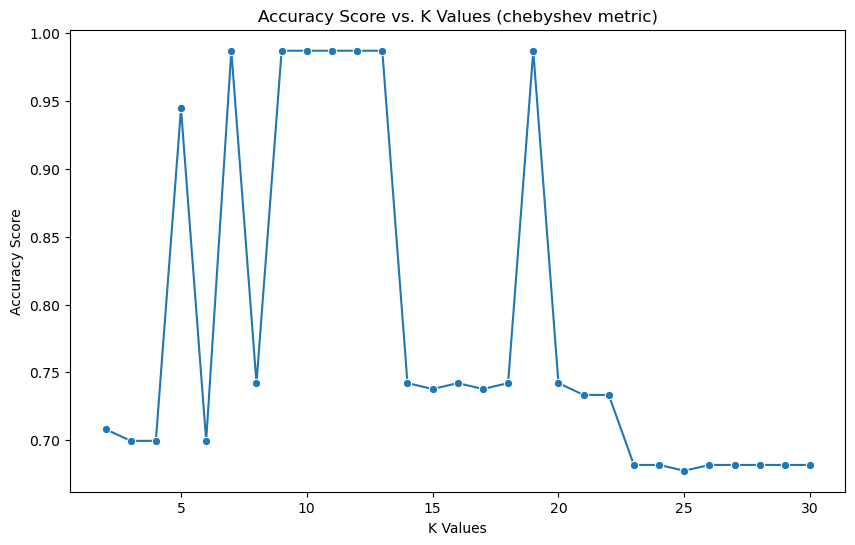

Dla metryki: chebyshev najlepsze K to: 7 dokładność wynosi dla niego: 0.99 z odchyleniem standardowym 0.02


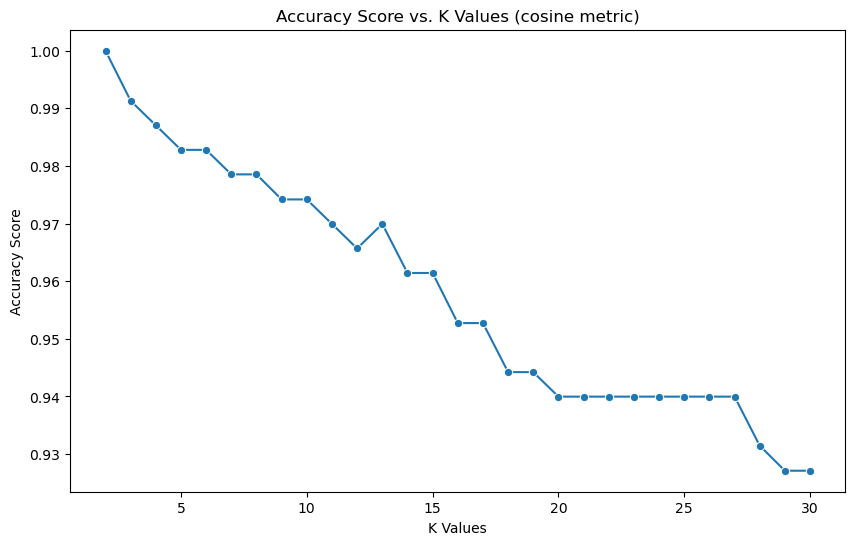

Dla metryki: cosine najlepsze K to: 3 dokładność wynosi dla niego: 0.99 z odchyleniem standardowym 0.02


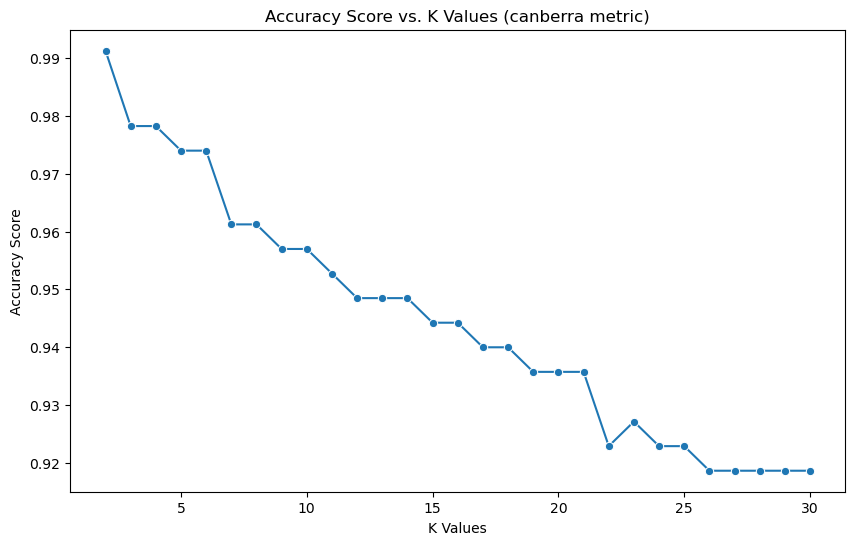

Dla metryki: canberra najlepsze K to: 3 dokładność wynosi dla niego: 0.98 z odchyleniem standardowym 0.03


In [49]:
#Wagi cd ale tym razem 
##Dane znormalizowane dla roznych metryk k
all_data = []
for metric in metrics:
    res = evaluate_knn_with_metric(X_norm, y_norm, metric=metric, weight=True)
    all_data.append(res)
    knn_results['KNN znormalizowany z wagami ' + res[0] + " k=" + str(res[1])] = res

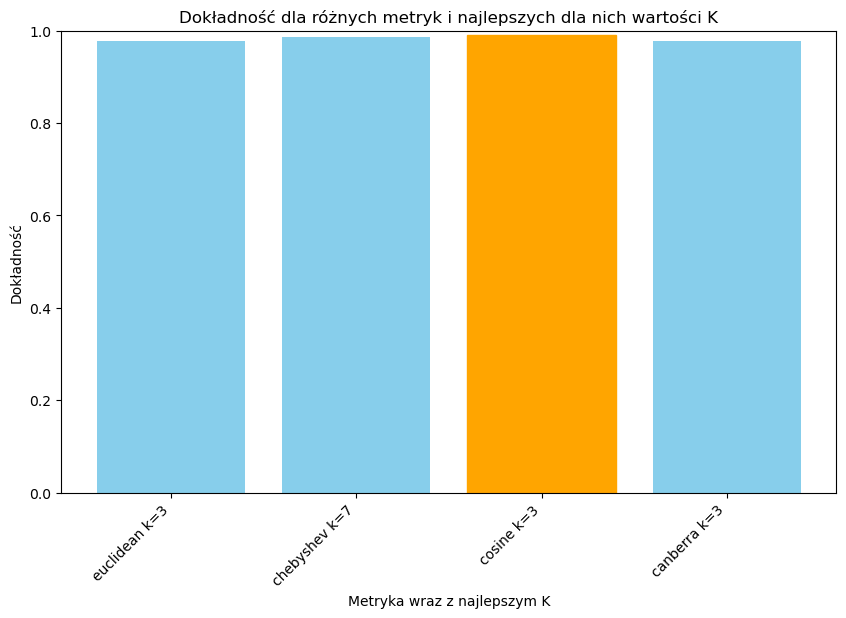

In [50]:
plot_accuracy(all_data)

In [51]:
print_stats(select_best(all_data))

Statystyki dla poszczególnych foldów dla metryki: cosine o k=3


,Fold1,Fold2,Fold3,Fold4,Fold5
Accuracy,1.0,1.0,1.0,1.0,0.956522
Precision,1.0,1.0,1.0,1.0,1.000000
Recall,1.0,1.0,1.0,1.0,0.894737
F1,1.0,1.0,1.0,1.0,0.944444


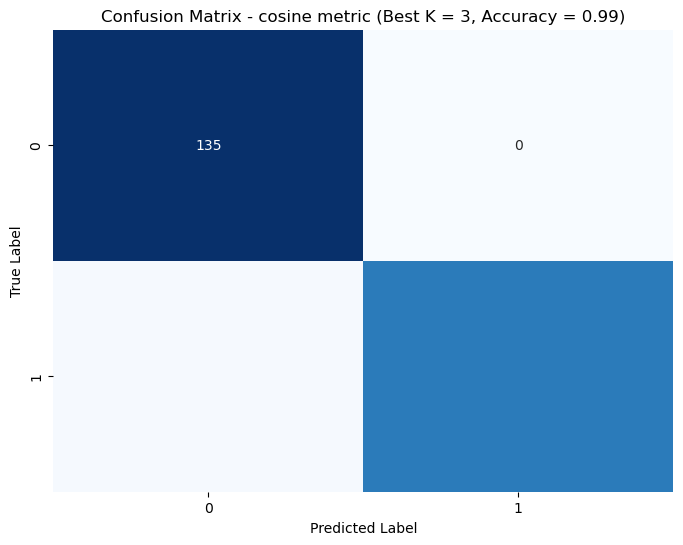

In [52]:
plot_confusion_matrix(select_best(all_data))

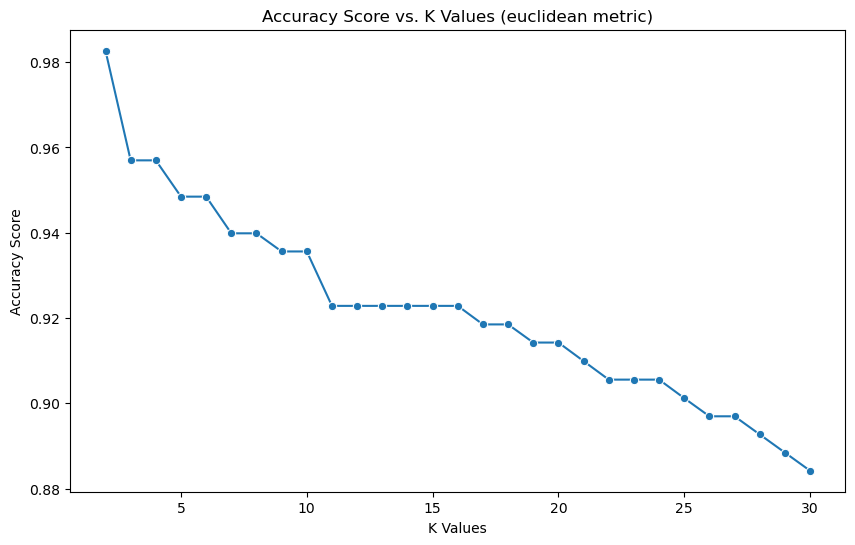

Dla metryki: euclidean najlepsze K to: 3 dokładność wynosi dla niego: 0.96 z odchyleniem standardowym 0.02


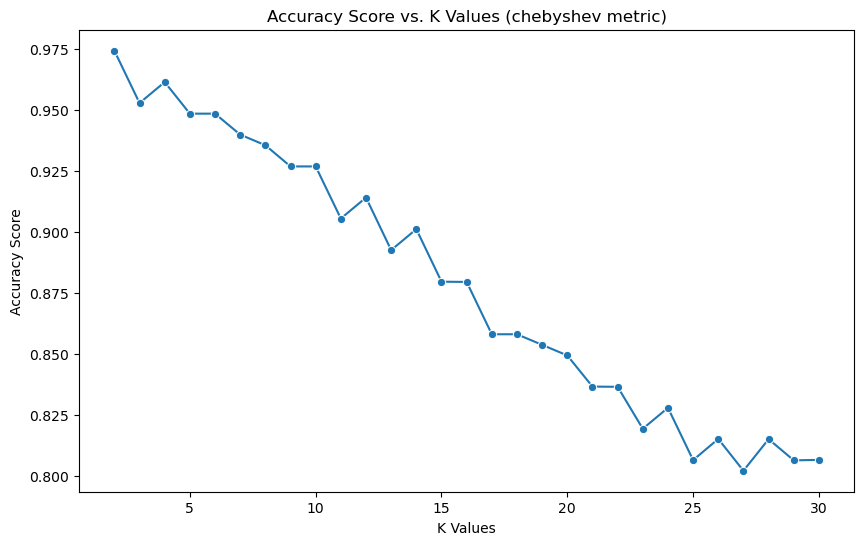

Dla metryki: chebyshev najlepsze K to: 3 dokładność wynosi dla niego: 0.95 z odchyleniem standardowym 0.02


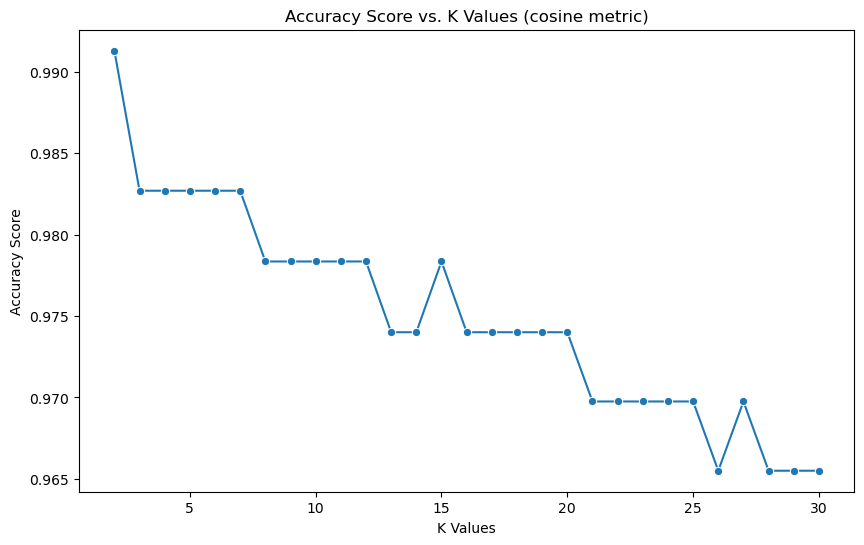

Dla metryki: cosine najlepsze K to: 7 dokładność wynosi dla niego: 0.98 z odchyleniem standardowym 0.02


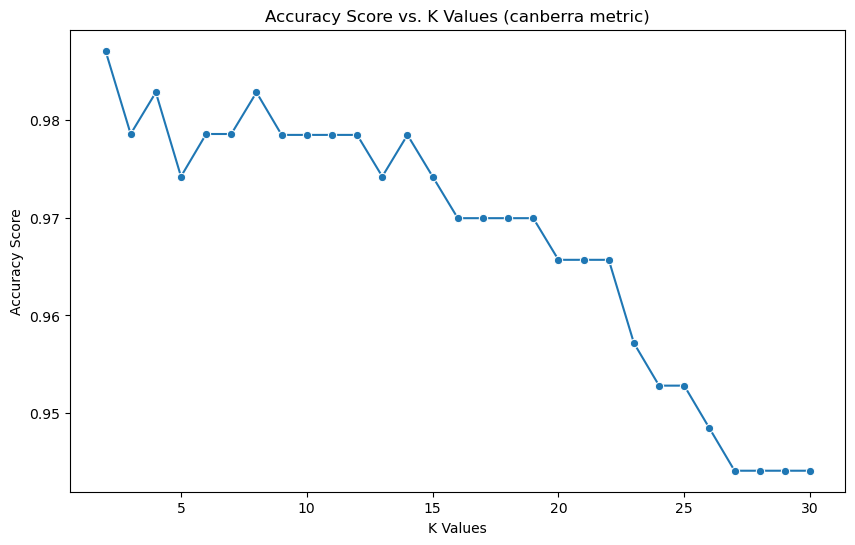

Dla metryki: canberra najlepsze K to: 3 dokładność wynosi dla niego: 0.98 z odchyleniem standardowym 0.01


In [53]:
#I wagi dla danych ustandaryzowanych
all_data = []
for metric in metrics:
    res = evaluate_knn_with_metric(X_stand, y_stand, metric=metric, weight=True)
    all_data.append(res)
    knn_results['KNN ustandaryzowany z wagami ' + res[0] + " k=" + str(res[1])] = res

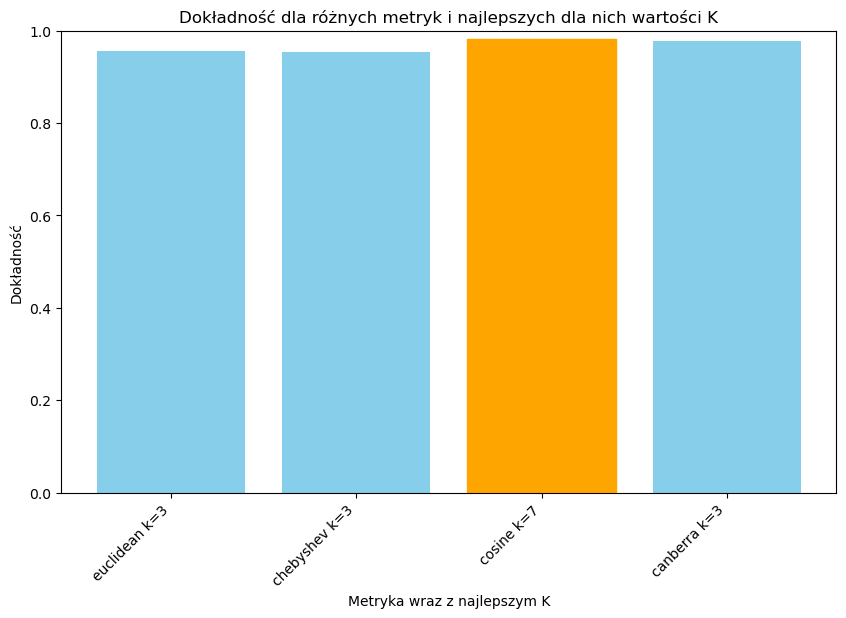

In [54]:
plot_accuracy(all_data)

In [55]:
print_stats(select_best(all_data))

Statystyki dla poszczególnych foldów dla metryki: cosine o k=7


,Fold1,Fold2,Fold3,Fold4,Fold5
Accuracy,0.978723,1.0,1.0,0.956522,0.978261
Precision,1.000000,1.0,1.0,1.000000,1.000000
Recall,0.950000,1.0,1.0,0.894737,0.947368
F1,0.974359,1.0,1.0,0.944444,0.972973


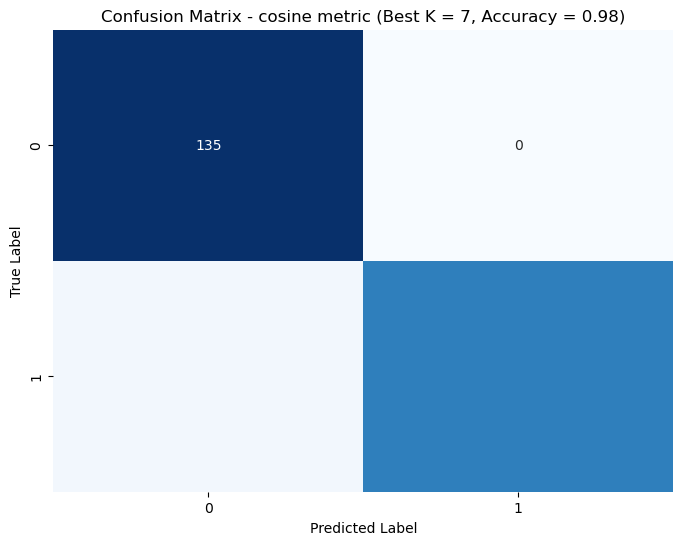

In [56]:
plot_confusion_matrix(select_best(all_data))

In [57]:
#Dokumentacja KNN https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
#Tutaj wzory są opisane te które uzywam w KNN https://docs.scipy.org/doc/scipy/reference/spatial.distance.html

In [58]:
draw_summary_data_frame(knn_results)

,Accuracy,Standard Deviation
KNN znormalizowany z wagami cosine k=3,99.13%,1.74%
KNN znormalizowany chebyshev k=7,98.7%,1.73%
KNN znormalizowany cosine k=3,98.7%,1.73%
KNN znormalizowany z wagami chebyshev k=7,98.7%,1.73%
KNN ustandaryzowany cosine k=7,98.27%,1.62%
KNN ustandaryzowany z wagami cosine k=7,98.27%,1.62%
KNN ustandaryzowany canberra k=3,97.85%,1.38%
KNN ustandaryzowany z wagami canberra k=3,97.85%,1.38%
KNN znormalizowany euclidean k=3,97.84%,1.38%
KNN znormalizowany z wagami euclidean k=3,97.84%,1.38%
